In [4]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
%matplotlib inline

style.use('ggplot')

In [6]:
# Could read in data directly after fetching in the first run and save as pickle below
# census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_index_free_df.pickle")
census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_df.pickle").reset_index()
census_occupation_gender_df

Year State County                       Name  Population  Median Age  \
0   2010    36    005     Bronx County, New York   1386657.0        32.8   
1   2010    36    047     Kings County, New York   2508340.0        34.2   
2   2010    36    061  New York County, New York   1586698.0        36.4   
3   2010    36    081    Queens County, New York   2233841.0        37.3   
4   2010    36    085  Richmond County, New York    469363.0        38.7   
5   2011    36    005     Bronx County, New York   1392002.0        32.8   
6   2011    36    047     Kings County, New York   2532645.0        34.2   
7   2011    36    061  New York County, New York   1601948.0        36.5   
8   2011    36    081    Queens County, New York   2247848.0        37.4   
9   2011    36    085  Richmond County, New York    470467.0        38.6   
10  2012    36    005     Bronx County, New York   1408473.0        33.0   
11  2012    36    047     Kings County, New York   2565635.0        34.2   
12  2012    36    061  New York County, New York   1619090.0        36.5   
13  2012    36    081    Queens County, New York   2272771.0        37.5   
14  2012    36    085  Richmond County, New York    470728.0        38.9   
15  2013    36    005     Bronx County, New York   1418733.0        33.3   
16  2013    36    047     Kings County, New York   2592149.0        34.4   
17  2013    36    061  New York County, New York   1626159.0        36.7   
18  2013    36    081    Queens County, New York   2296175.0        37.7   
19  2013    36    085  Richmond County, New York    472621.0        39.6   
20  2014    36    005     Bronx County, New York   1438159.0        33.4   
21  2014    36    047     Kings County, New York   2621793.0        34.5   
22  2014    36    061  New York County, New York   1636268.0        36.6   
23  2014    36    081    Queens County, New York   2321580.0        37.8   
24  2014    36    085  Richmond County, New York    473279.0        39.7   
25  2015    36    005     Bronx County, New York   1455444.0        33.6   
26  2015    36    047     Kings County, New York   2636735.0        34.7   
27  2015    36    061  New York County, New York   1644518.0        36.8   
28  2015    36    081    Queens County, New York   2339150.0        38.1   
29  2015    36    085  Richmond County, New York    474558.0        39.8   
30  2016    36    005     Bronx County, New York   1455720.0        33.6   
31  2016    36    047     Kings County, New York   2629150.0        34.8   
32  2016    36    061  New York County, New York   1643734.0        37.1   
33  2016    36    081    Queens County, New York   2333054.0        38.3   
34  2016    36    085  Richmond County, New York    476015.0        39.7   
35  2017    36    005     Bronx County, New York   1471160.0        34.0   
36  2017    36    047     Kings County, New York   2648771.0        35.2   
37  2017    36    061  New York County, New York   1664727.0        37.3   
38  2017    36    081    Queens County, New York   2358582.0        38.7   
39  2017    36    085  Richmond County, New York    479458.0        40.4   
40  2018    36    061  New York County, New York   1628701.0        37.6   
41  2018    36    047     Kings County, New York   2582830.0        35.4   
42  2018    36    081    Queens County, New York   2278906.0        39.2   
43  2018    36    005     Bronx County, New York   1432132.0        34.4   
44  2018    36    085  Richmond County, New York    476179.0        40.1   

    Household Income  Per Capita Income  Poverty Count  Poverty Rate  ...  \
0            32568.0            16671.0       408584.0     29.465398  ...   
1            42143.0            23218.0       571936.0     22.801375  ...   
2            63832.0            56556.0       254289.0     16.026301  ...   
3            53054.0            24530.0       332165.0     14.869680  ...   
4            70560.0            30122.0        54353.0     11.580163  ...   
5            32058.0            16879.0      

In [7]:
financial_specialists = pd.DataFrame()

financial_specialists['Year']=census_occupation_gender_df['Year']
financial_specialists['Name']=census_occupation_gender_df['Name']
financial_specialists['County']=census_occupation_gender_df['County']
financial_specialists['Financial_specialists_male']=census_occupation_gender_df['Financial_specialists_male']
financial_specialists['Financial_specialists_female']=census_occupation_gender_df['Financial_specialists_female']

financial_specialists

Year                       Name County  Financial_specialists_male  \
0   2010     Bronx County, New York    005                      2922.0   
1   2010     Kings County, New York    047                     10578.0   
2   2010  New York County, New York    061                     22505.0   
3   2010    Queens County, New York    081                     12474.0   
4   2010  Richmond County, New York    085                      2906.0   
5   2011     Bronx County, New York    005                      3036.0   
6   2011     Kings County, New York    047                     12407.0   
7   2011  New York County, New York    061                     26440.0   
8   2011    Queens County, New York    081                     12283.0   
9   2011  Richmond County, New York    085                      3572.0   
10  2012     Bronx County, New York    005                      2559.0   
11  2012     Kings County, New York    047                     10900.0   
12  2012  New York County, New York    061                     25304.0   
13  2012    Queens County, New York    081                     12352.0   
14  2012  Richmond County, New York    085                      2745.0   
15  2013     Bronx County, New York    005                      1974.0   
16  2013     Kings County, New York    047                     10765.0   
17  2013  New York County, New York    061                     23033.0   
18  2013    Queens County, New York    081                     12428.0   
19  2013  Richmond County, New York    085                      3765.0   
20  2014     Bronx County, New York    005                      3252.0   
21  2014     Kings County, New York    047                     11821.0   
22  2014  New York County, New York    061                     21701.0   
23  2014    Queens County, New York    081                     11948.0   
24  2014  Richmond County, New York    085                      3114.0   
25  2015     Bronx County, New York    005                      2852.0   
26  2015     Kings County, New York    047                     10096.0   
27  2015  New York County, New York    061                     22486.0   
28  2015    Queens County, New York    081                     13864.0   
29  2015  Richmond County, New York    085                      2924.0   
30  2016     Bronx County, New York    005                      3171.0   
31  2016     Kings County, New York    047                     11162.0   
32  2016  New York County, New York    061                     23648.0   
33  2016    Queens County, New York    081                     12805.0   
34  2016  Richmond County, New York    085                      3704.0   
35  2017     Bronx County, New York    005                      2950.0   
36  2017     Kings County, New York    047                     11608.0   
37  2017  New York County, New York    061                     28096.0   
38  2017    Queens County, New York    081                     14777.0   
39  2017  Richmond County, New York    085                      3274.0   
40  2018  New York County, New York    061                     22645.0   
41  2018     Kings County, New York    047                     11139.0   
42  2018    Queens County, New York    081                     11494.0   
43  2018     Bronx County, New York    005                      2336.0   
44  2018  Richmond County, New York    085                      3342.0   

    Financial_specialists_female  
0                         4344.0  
1                        10787.0  
2                        13964.0  
3                        13008.0  
4                         1931.0  
5                         4054.0  
6                         9384.0  
7                        13585.0  
8                        12396.0  
9                         1964.0  
10                        4782.0  
11                       11310.0  
12                       13628.0  
13                       12281.0  
14                        2989.0  
15                        4596.0  
16  

In [8]:
financial_specialists.set_index(['County', 'Year', 'Name'], inplace=True)
financial_specialists

Financial_specialists_male  \
County Year Name                                                    
005    2010 Bronx County, New York                         2922.0   
047    2010 Kings County, New York                        10578.0   
061    2010 New York County, New York                     22505.0   
081    2010 Queens County, New York                       12474.0   
085    2010 Richmond County, New York                      2906.0   
005    2011 Bronx County, New York                         3036.0   
047    2011 Kings County, New York                        12407.0   
061    2011 New York County, New York                     26440.0   
081    2011 Queens County, New York                       12283.0   
085    2011 Richmond County, New York                      3572.0   
005    2012 Bronx County, New York                         2559.0   
047    2012 Kings County, New York                        10900.0   
061    2012 New York County, New York                     25304.0   
081    2012 Queens County, New York                       12352.0   
085    2012 Richmond County, New York                      2745.0   
005    2013 Bronx County, New York                         1974.0   
047    2013 Kings County, New York                        10765.0   
061    2013 New York County, New York                     23033.0   
081    2013 Queens County, New York                       12428.0   
085    2013 Richmond County, New York                      3765.0   
005    2014 Bronx County, New York                         3252.0   
047    2014 Kings County, New York                        11821.0   
061    2014 New York County, New York                     21701.0   
081    2014 Queens County, New York                       11948.0   
085    2014 Richmond County, New York                      3114.0   
005    2015 Bronx County, New York                         2852.0   
047    2015 Kings County, New York                        10096.0   
061    2015 New York County, New York                     22486.0   
081    2015 Queens County, New York                       13864.0   
085    2015 Richmond County, New York                      2924.0   
005    2016 Bronx County, New York                         3171.0   
047    2016 Kings County, New York                        11162.0   
061    2016 New York County, New York                     23648.0   
081    2016 Queens County, New York                       12805.0   
085    2016 Richmond County, New York                      3704.0   
005    2017 Bronx County, New York                         2950.0   
047    2017 Kings County, New York                        11608.0   
061    2017 New York County, New York                     28096.0   
081    2017 Queens County, New York                       14777.0   
085    2017 Richmond County, New York                      3274.0   
061    2018 New York County, New York                     22645.0   
047    2018 Kings County, New York                        11139.0   
081    2018 Queens County, New York                       11494.0   
005    2018 Bronx County, New York                         2336.0   
085    2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
005    2010 Bronx County, New York                           4344.0  
047    2010 Kings County, New York                          10787.0  
061    2010 New York County, New York                       13964.0  
081    2010 Queens County, New York                         13008.0  
085    2010 Richmond County, New York                        1931.0  
005    2011 Bronx County, New York                           4054.0  
047    2011 Kings County, New York                           9384.0  
061    2011 New York County, New York                       13585.0  
081    2011 Queens County, New York                         12396.0  
085    2011 Richmond Coun

## Sort by Borough to get annual time-series data

In [9]:
financial_specialists_Bronx = financial_specialists.loc[['005']]
financial_specialists_Bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [10]:
financial_specialists_Brooklyn = financial_specialists.loc[['047']]
financial_specialists_Brooklyn 

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [11]:
financial_specialists_Manhattan = financial_specialists.loc[['061']]
financial_specialists_Manhattan 

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [12]:
financial_specialists_Queens = financial_specialists.loc[['081']]
financial_specialists_Queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [13]:
financial_specialists_Staten_Island = financial_specialists.loc[['085']]
financial_specialists_Staten_Island

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

### Monte Carlo Simulation on Financial Specialists in Manhattan Over 30 Years From 2018

In [14]:
# Get 1 year's worth of historical data
df = financial_specialists_Manhattan
df

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                     22505.0   
       2011 New York County, New York                     26440.0   
       2012 New York County, New York                     25304.0   
       2013 New York County, New York                     23033.0   
       2014 New York County, New York                     21701.0   
       2015 New York County, New York                     22486.0   
       2016 New York County, New York                     23648.0   
       2017 New York County, New York                     28096.0   
       2018 New York County, New York                     22645.0   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                       13964.0  
       2011 New York County, New York                       13585.0  
       2012 New York County, New York                       13628.0  
       2013 New York County, New York                       13645.0  
       2014 New York County, New York                       14898.0  
       2015 New York County, New York                       11651.0  
       2016 New York County, New York                       13293.0  
       2017 New York County, New York                       10637.0  
       2018 New York County, New York                       10456.0

In [15]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
# df.drop(columns=['', '', '', ''], level=1, inplace=True) # drop columns
#df.head()

In [16]:
# Use the `pct_change` function to calculate daily returns of `TSLA` and `SPHD`.
annual_moves = df.pct_change().fillna(0)
annual_moves

Financial_specialists_male  \
County Year Name                                                    
061    2010 New York County, New York                    0.000000   
       2011 New York County, New York                    0.174850   
       2012 New York County, New York                   -0.042965   
       2013 New York County, New York                   -0.089749   
       2014 New York County, New York                   -0.057830   
       2015 New York County, New York                    0.036173   
       2016 New York County, New York                    0.051677   
       2017 New York County, New York                    0.188092   
       2018 New York County, New York                   -0.194013   

                                       Financial_specialists_female  
County Year Name                                                     
061    2010 New York County, New York                      0.000000  
       2011 New York County, New York                     -0.027141  
       2012 New York County, New York                      0.003165  
       2013 New York County, New York                      0.001247  
       2014 New York County, New York                      0.091829  
       2015 New York County, New York                     -0.217949  
       2016 New York County, New York                      0.140932  
       2017 New York County, New York                     -0.199804  
       2018 New York County, New York                     -0.017016

In [17]:
# Use the `mean` function to calculate the mean of market moves for `male` and `female`, respectively
avg_annual_moves_financial_specialists_male = annual_moves.mean()['Financial_specialists_male']
avg_annual_moves_financial_specialists_female = annual_moves.mean()['Financial_specialists_female']
avg_annual_moves_financial_specialists_male

0.007359420378032018

In [18]:
avg_annual_moves_financial_specialists_female

-0.024970790836429835

In [19]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_specialists_male = annual_moves.std()['Financial_specialists_male']
std_dev_annual_moves_financial_specialists_female = annual_moves.std()['Financial_specialists_female']
std_dev_annual_moves_financial_specialists_female

0.11786840309957754

In [20]:
std_dev_annual_moves_financial_specialists_male

0.12264227455573176

In [21]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_specialists_male_last  = df['Financial_specialists_male'][-1]
financial_specialists_female_last = df['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_employed_df = pd.DataFrame()
employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_male = []
    simulated_financial_specialist_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_male = [financial_specialists_male_last]
    simulated_financial_specialists_female = [financial_specialists_female_last]
    
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_male = simulated_financial_specialists_male[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_male, std_dev_annual_moves_financial_specialists_male))
        simulated_financial_specialist_female = simulated_financial_specialists_female[count] * (1 + np.random.normal(avg_annual_moves_financial_specialists_female, std_dev_annual_moves_financial_specialists_female))

        simulated_financial_specialists_male.append(simulated_financial_specialist_male)
        simulated_financial_specialists_female.append(simulated_financial_specialist_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_employed_df['Financial_specialists_male'] = simulated_financial_specialists_male
    simulated_employed_df['Financial_specialists_female'] = simulated_financial_specialists_female
    
    # Calculate the daily returns of simulated prices
    simulated_employed_moves = simulated_employed_df.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    employed_annual_moves = simulated_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    employed_cumulative_moves[n] = (1 + employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.037765  1.375087  1.055670  1.211326  1.286252  0.951318  1.015051   
2   0.904981  1.451858  0.964205  1.279421  1.110975  1.097232  1.096996   
3   0.999594  1.312219  1.047513  1.598264  1.085955  1.168594  1.228588   
4   1.012545  1.236911  1.123479  2.057135  1.270495  1.267647  1.142317   
5   0.843956  1.314089  1.285420  2.020976  1.551836  1.073109  1.004900   
6   0.819906  1.589858  1.491717  2.140123  1.678836  1.003167  1.107094   
7   0.774001  1.325053  1.657494  2.135333  1.658911  0.877699  1.370946   
8   0.737668  1.429253  1.605198  2.179448  2.192804  0.860370  1.477713   
9   0.667574  1.704624  1.442093  2.742324  2.359589  0.877855  1.774008   
10  0.701046  2.055333  1.408979  2.382295  2.748272  0.981897  1.804507   
11  0.554378  2.071716  1.382291  2.551997  2.924251  0.852451  1.805034   
12  0.499710  1.986079  1.541554  2.637805  3.528514  0.983324  1.385691   
13  0.590490  1.908534  1.202770  3.083968  2.759093  0.822546  1.429425   
14  0.593851  1.837147  1.160274  2.766051  2.687059  0.851636  1.246635   
15  0.749420  1.904073  0.950530  2.374429  3.171973  0.946557  1.250622   
16  0.799341  1.779773  0.994676  2.723630  3.571899  1.214252  1.420318   
17  0.824656  1.408115  0.848038  2.886179  3.894313  1.253981  1.374389   
18  0.796984  1.476930  0.697844  2.862314  3.605650  1.654328  1.295469   
19  0.862343  1.509150  0.747741  2.965268  4.171750  1.808526  1.304983   
20  0.877770  1.131168  0.714362  3.003539  4.314510  1.378326  1.184893   
21  0.748513  1.254403  0.803717  3.047955  5.136839  1.236647  1.293410   
22  0.861212  1.228561  0.720887  2.661967  4.705976  1.110005  1.315712   
23  0.949260  1.228112  0.822386  2.742883  5.985553  0.745436  1.079583   
24  0.963881  1.247348  0.838566  2.747892  5.797252  0.707652  1.118128   
25  0.959191  1.148378  0.816060  2.292062  6.112744  0.726346  1.199304   
26  1.051156  1.244108  0.786471  2.132020  6.749809  0.600432  1.330346   
27  1.123250  1.238315  0.616917  2.223954  7.354422  0.608360  1.092971   
28  0.909649  1.180106  0.658612  2.294797  7.478387  0.662587  1.067301   
29  1.113705  1.139996  0.618823  2.719632  8.071596  0.610387  0.893689   
30  0.767058  1.160077  0.633777  2.556514  9.895559  0.756775  0.813758   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.811601  1.049881  0.928706  ...  0.963527  1.303249  0.884502  0.894157   
2   0.902780  0.963718  0.992197  ...  0.977759  1.613180  0.759113  0.882840   
3   0.801177  1.011234  0.778782  ...  1.089714  1.760337  0.922151  1.043296   
4   0.929221  1.286328  0.813871  ...  1.159423  1.347070  0.717062  0.953445   
5   1.054385  1.240090  0.700232  ...  1.167522  1.084696  0.816288  0.990140   
6   1.109678  1.249094  0.762314  ...  1.225043  1.177706  0.724499  0.949004   
7   0.787467  1.102265  0.704073  ...  1.490456  1.107096  0.769831  1.068538   
8   0.771498  1.222366  0.694935  ...  1.819838  1.169176  0.811523  0.919882   
9   0.805505  1.213370  0.660790  ...  1.611782  1.152260  0.739763  0.705789   
10  0.649955  1.189452  0.724591  ...  1.687685  1.155926  0.653578  0.806211   
11  0.712056  1.094304  0.834300  ...  1.632553  1.405229  0.555524  0.936346   
12  0.645598  1.116480  0.869987  ...  1.809876  1.656348  0.516253  0.995241   
13  0.626677  1.315222  0.868573  ...  1.636352  1.885423  0.634285  0.809941   
14  0.627253  1.321384  0.972988  ...  1.698815  2.083879  0.801775  0.883432   
15  0.613843  1.362043  0.879196  ...  1.581069  1.945036  0.662186  0.877536   
16  0.687239  1.420158  0.992379  ...  1.402762  2.149275  0.590204  0.904257   
17  0.803487  1.553642  0.848528  ...  1.453338  2.813244  0.598595  0.970939   
18  0.741489  2.195441  0.874280  ...

In [22]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Manhattan 30 Years from 2018 - Male"
employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Shifts in Financial Specialists in Manhattan')
plt.show()

<Figure size 432x288 with 0 Axes>

In [23]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves = employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves.head()

0    0.767058
1    1.160077
2    0.633777
3    2.556514
4    9.895559
Name: 30, dtype: float64

In [24]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_manhattan = plt.figure()
ending_cumulative_moves.plot(kind='hist', bins=10, color = 'turquoise', 
                             title='Manhattan Financial Specialist Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [25]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
ending_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.059, 1.052]    0.516
(1.052, 2.035]    0.334
(2.035, 3.018]    0.093
(3.018, 4.0]      0.035
(4.0, 4.983]      0.012
(4.983, 5.965]    0.005
(7.93, 8.913]     0.002
(8.913, 9.896]    0.001
(6.948, 7.93]     0.001
(5.965, 6.948]    0.001
Name: 30, dtype: float64

In [26]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval = ending_cumulative_moves.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.269420
0.975    3.872538
Name: 30, dtype: float64

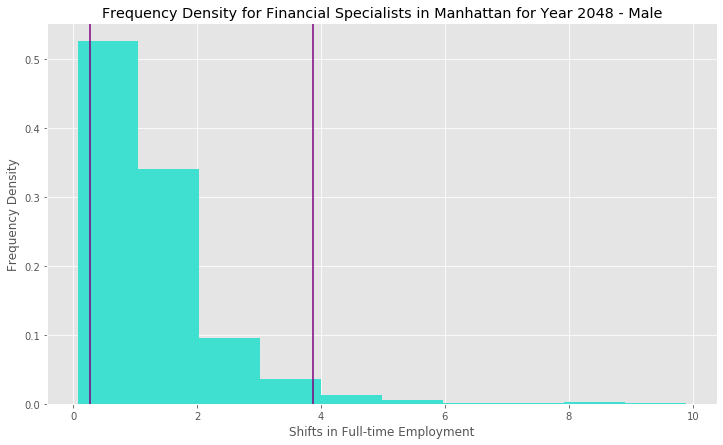

In [27]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves = plt.figure()
ending_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Frequency Density for Financial Specialists in Manhattan for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval.iloc[0], color='purple')
plt.axvline(confidence_interval.iloc[1], color='purple')
plt.show()

In [28]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves = employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves.head()

0    0.554378
1    2.071716
2    1.382291
3    2.551997
4    2.924251
Name: 11, dtype: float64

In [29]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative return ranges
tenth_cumulative_moves.value_counts(bins=10) / len(ending_cumulative_moves)

(0.695, 1.061]    0.360
(1.061, 1.428]    0.257
(0.323, 0.695]    0.171
(1.428, 1.795]    0.133
(1.795, 2.162]    0.050
(2.162, 2.528]    0.019
(2.528, 2.895]    0.005
(3.262, 3.628]    0.002
(2.895, 3.262]    0.002
(3.628, 3.995]    0.001
Name: 11, dtype: float64

In [30]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval = tenth_cumulative_moves.quantile(q=[0.025, 0.975])
tenth_confidence_interval

0.025    0.473853
0.975    2.218322
Name: 11, dtype: float64

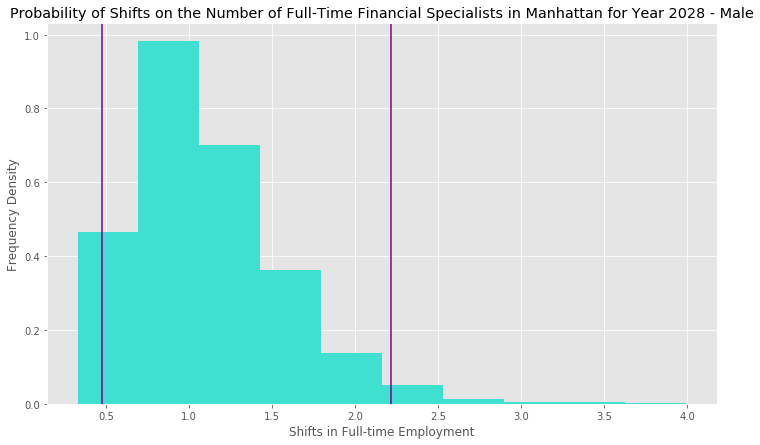

In [31]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves = plt.figure()
tenth_cumulative_moves.plot(kind='hist', density=True, bins=10, color = 'turquoise', 
                             title='Probability of Shifts on the Number of Full-Time Financial Specialists in Manhattan for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval.iloc[0], color='purple')
plt.axvline(tenth_confidence_interval.iloc[1], color='purple')
plt.show()

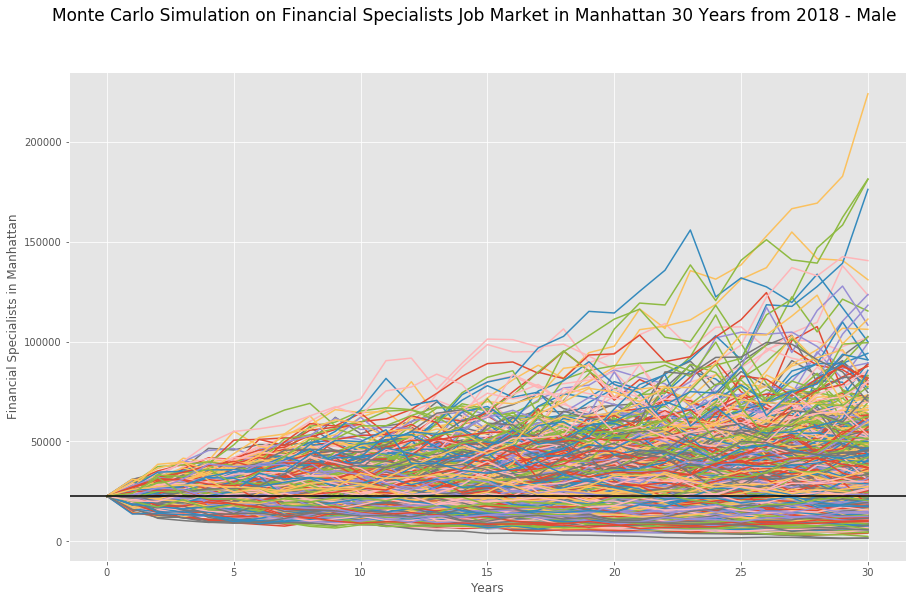

In [32]:
# Set initial investment
initial_employment = financial_specialists_male_last

fig_finance = plt.figure(figsize=(15,9))
fig_finance.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Manhattan 30 Years from 2018 - Male', fontsize=17)
plt.plot(employed_cumulative_moves * initial_employment)
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

In [33]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound = initial_employment * confidence_interval.iloc[0]
employment_gnl_upper_bound = initial_employment * confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment:,.0f}k in male financial specialists"
      f" in Manhattan 30 years from 2018 will end within in the range of"
      f" {employment_gnl_lower_bound:,.0f}k and {employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 22,645k in male financial specialists in Manhattan 30 years from 2018 will end within in the range of 6,101k and 87,694k.


In [126]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound = initial_employment * tenth_confidence_interval.iloc[0]
tenth_employment_gnl_upper_bound = initial_employment * tenth_confidence_interval.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment:,.0f}k in male financial specialists"
      f" in Manhattan over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound:,.0f}k and {tenth_employment_gnl_upper_bound:,.0f}k.")

There is a 95% chance that an initial employment of 22,645k in male financial specialists in Manhattan over the next 10 years will end within in the range of 10,730k and 50,234k.


In [37]:
employed_trajectories = initial_employment*employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories

Lower 5%        Median      Upper 5%
0   22645.000000  22645.000000  22645.000000
1   18378.404202  22886.453974  27488.828740
2   16667.372688  22920.622707  30227.747844
3   15739.350884  23000.162583  31969.155154
4   15366.268210  23017.943294  33798.146933
5   14683.243563  23195.720985  35408.123728
6   13536.312050  23097.310545  38451.225729
7   13336.034350  23090.752807  39775.068628
8   12817.923208  23049.017019  42639.809702
9   12366.803862  23093.808712  42552.227163
10  12084.587495  23418.935582  43129.157413
11  11931.617240  23008.544796  44643.445726
12  11553.393265  23169.945915  46066.753105
13  11158.136076  23136.169467  47444.343895
14  10663.724225  23142.194923  49680.855160
15  10023.024726  23350.971683  50496.856115
16  10173.363211  23170.971992  52054.289373
17   9871.880754  23419.902362  53265.093701
18   9948.191082  23298.974353  54697.376085
19   9631.449127  23861.695268  56116.151357
20   9242.881459  23439.939425  58530.858967
21   9002.656777  23491.564373  60010.394249
22   8609.385952  23293.824123  60736.643926
23   8231.108351  23196.570561  60636.930285
24   8226.158763  23336.284324  62842.881744
25   8176.758599  23188.886695  63816.834276
26   8143.145535  22782.792765  64143.402648
27   8116.284310  22757.791743  68960.950128
28   7719.156489  23041.887505  69305.588866
29   7372.893264  23004.098149  68621.792811
30   7417.450453  23194.156767  71449.201554

In [154]:
ax_cum_employed = plt.figure()
employed_trajectories.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Manhattan with 22,645k Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = financial_specialists_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_specialists_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Manhattan')
plt.show()

<Figure size 432x288 with 0 Axes>

### Monte Carlo Simulation on Financial Specialists in Bronx Over 30 Years From 2018

In [128]:
df_bronx = financial_specialists_Bronx
df_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                      2922.0   
       2011 Bronx County, New York                      3036.0   
       2012 Bronx County, New York                      2559.0   
       2013 Bronx County, New York                      1974.0   
       2014 Bronx County, New York                      3252.0   
       2015 Bronx County, New York                      2852.0   
       2016 Bronx County, New York                      3171.0   
       2017 Bronx County, New York                      2950.0   
       2018 Bronx County, New York                      2336.0   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                        4344.0  
       2011 Bronx County, New York                        4054.0  
       2012 Bronx County, New York                        4782.0  
       2013 Bronx County, New York                        4596.0  
       2014 Bronx County, New York                        3024.0  
       2015 Bronx County, New York                        3929.0  
       2016 Bronx County, New York                        4453.0  
       2017 Bronx County, New York                        3983.0  
       2018 Bronx County, New York                        3640.0

In [129]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_bronx = df_bronx.pct_change().fillna(0)
annual_moves_bronx

Financial_specialists_male  \
County Year Name                                                 
005    2010 Bronx County, New York                    0.000000   
       2011 Bronx County, New York                    0.039014   
       2012 Bronx County, New York                   -0.157115   
       2013 Bronx County, New York                   -0.228605   
       2014 Bronx County, New York                    0.647416   
       2015 Bronx County, New York                   -0.123001   
       2016 Bronx County, New York                    0.111851   
       2017 Bronx County, New York                   -0.069694   
       2018 Bronx County, New York                   -0.208136   

                                    Financial_specialists_female  
County Year Name                                                  
005    2010 Bronx County, New York                      0.000000  
       2011 Bronx County, New York                     -0.066759  
       2012 Bronx County, New York                      0.179576  
       2013 Bronx County, New York                     -0.038896  
       2014 Bronx County, New York                     -0.342037  
       2015 Bronx County, New York                      0.299272  
       2016 Bronx County, New York                      0.133367  
       2017 Bronx County, New York                     -0.105547  
       2018 Bronx County, New York                     -0.086116

In [130]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_bronx_male = annual_moves_bronx.mean()['Financial_specialists_male']
avg_annual_moves_financial_bronx_female = annual_moves_bronx.mean()['Financial_specialists_female']
avg_annual_moves_financial_bronx_male

0.0013035161272441458

In [131]:
avg_annual_moves_financial_bronx_female

-0.0030153880620906737

In [132]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_bronx_male = annual_moves_bronx.std()['Financial_specialists_male']
std_dev_annual_moves_financial_bronx_female = annual_moves_bronx.std()['Financial_specialists_female']
std_dev_annual_moves_financial_bronx_male

0.26772601992691375

In [133]:
std_dev_annual_moves_financial_bronx_female

0.18742704475765454

In [134]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_bronx_male_last  = df_bronx['Financial_specialists_male'][-1]
financial_bronx_female_last = df_bronx['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_bronx_employed_df = pd.DataFrame()
bronx_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_bronx_male = []
    simulated_financial_specialist_bronx_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_bronx_male = [financial_bronx_male_last]
    simulated_financial_specialists_bronx_female = [financial_bronx_female_last]
    
            

    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_bronx_male = simulated_financial_specialists_bronx_male[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_male, std_dev_annual_moves_financial_bronx_male))
        simulated_financial_specialist_bronx_female = simulated_financial_specialists_bronx_female[count] * (1 + np.random.normal(avg_annual_moves_financial_bronx_female, std_dev_annual_moves_financial_bronx_female))

        simulated_financial_specialists_bronx_male.append(simulated_financial_specialist_bronx_male)
        simulated_financial_specialists_bronx_female.append(simulated_financial_specialist_bronx_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_bronx_employed_df['Financial_specialists_male'] = simulated_financial_specialists_bronx_male
    simulated_bronx_employed_df['Financial_specialists_female'] = simulated_financial_specialists_bronx_female
    
    # Calculate the daily returns of simulated prices
    simulated_bronx_employed_moves = simulated_bronx_employed_df.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    bronx_employed_annual_moves = simulated_bronx_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    bronx_employed_cumulative_moves[n] = (1 + bronx_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
bronx_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.960547  1.357093  1.170117  0.881577  0.992340  1.046746  0.829624   
2   0.750492  1.541888  1.698087  0.998876  0.953267  0.888410  0.643031   
3   1.022349  1.162855  2.317282  1.033184  1.400947  0.968666  0.751990   
4   0.820513  1.271678  2.726994  0.898800  1.482563  0.909460  0.774228   
5   0.649288  0.654279  2.840290  1.253384  1.104000  1.028350  0.921015   
6   0.626107  0.811650  4.073256  1.097071  1.112809  1.316709  1.036326   
7   0.715786  0.827788  4.700833  1.714506  0.964424  1.256247  0.369785   
8   0.727165  0.803794  2.828713  2.830555  1.255363  1.078299  0.523373   
9   1.177755  1.036122  3.844098  3.175947  1.434627  0.391907  0.332400   
10  0.453624  0.900546  4.973513  2.774500  1.470856  0.314445  0.294860   
11  0.403002  0.845839  5.573049  2.282014  0.839815  0.340548  0.385047   
12  0.205468  0.885393  7.392828  2.075843  0.749886  0.369105  0.415540   
13  0.359788  0.798562  7.300433  3.246994  0.939109  0.534205  0.339076   
14  0.405020  1.025249  5.722111  3.447996  1.277765  0.542699  0.350718   
15  0.670721  0.810444  7.358400  3.642364  1.085274  0.474528  0.385471   
16  0.581767  1.200177  6.594600  3.462910  0.822603  0.776692  0.438365   
17  0.457970  1.068814  6.301724  4.139803  0.455428  1.062191  0.438374   
18  0.643814  1.074944  7.810618  3.219316  0.470610  1.326188  0.324844   
19  0.562793  1.456427  7.612551  3.438301  0.545192  1.385287  0.227850   
20  0.534501  1.597558  8.336280  2.329248  0.711505  1.661367  0.319816   
21  0.433275  1.145424  9.035776  1.667924  1.246836  1.872463  0.326385   
22  0.558729  2.006749  8.789111  1.820530  1.191105  1.706835  0.302591   
23  0.451965  1.179697  7.662786  1.753049  0.858010  1.758937  0.268140   
24  0.342015  0.826405  9.098849  1.655189  0.788874  2.318773  0.213761   
25  0.288420  0.477000  6.656323  1.975919  0.960969  2.775279  0.142329   
26  0.304459  0.310027  3.944031  2.657671  1.202620  2.673364  0.195357   
27  0.437399  0.393964  2.373973  3.234121  1.281620  3.347488  0.158349   
28  0.490797  0.440362  2.608262  1.894229  1.500025  2.737518  0.112008   
29  0.516476  0.489419  4.353228  1.229583  1.566072  3.796741  0.106516   
30  0.284799  0.401737  4.245292  1.085278  1.179495  3.348286  0.123258   

         7         8         9    ...       990        991       992  \
0   1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1   1.313968  1.132870  0.928884  ...  0.783920   0.701699  0.620450   
2   1.190484  0.775362  0.957250  ...  0.832639   0.917291  0.406168   
3   1.184244  0.729532  0.960829  ...  0.586919   1.010180  0.293064   
4   1.496516  0.712052  1.444710  ...  0.747640   1.377352  0.224399   
5   1.530826  0.692380  1.337425  ...  0.330846   2.183250  0.121841   
6   1.941474  0.376862  1.810742  ...  0.388795   2.770225  0.148445   
7   1.942341  0.286279  1.609614  ...  0.233762   3.838615  0.117440   
8   1.850993  0.254204  2.044541  ...  0.223772   4.688928  0.108403   
9   2.120191  0.303258  1.172931  ...  0.251261   5.686788  0.023176   
10  1.548081  0.437917  1.129185  ...  0.349401   7.708048  0.025971   
11  2.419583  0.445412  1.029015  ...  0.278026   9.750208  0.026785   
12  1.043117  0.407554  1.147287  ...  0.253003  10.459603  0.027068   
13  1.172575  0.583193  1.351521  ...  0.232007   4.034072  0.018870   
14  0.699429  0.719060  1.406017  ...  0.254442   3.307382  0.026024   
15  0.904868  0.761611  1.149578  ...  0.330793   2.475839  0.037325   
16  1.232234  0.769061  1.319709  ...  0.285306   2.080419  0.047342   
17  1.671929  1.057067  1.823953  ...  0.258078   2.763230  0.060713   
18  1.761990  1.034222  1.589406  ...  0.211160   4.625030  0.071709   
19  2.075896  1.225005  1.000148  ...  0.234908   5.364100  0.052626   
20  1.713470  0.729484  1.042665  ...  0.239139   4.733608  0.02

<Figure size 432x288 with 0 Axes>

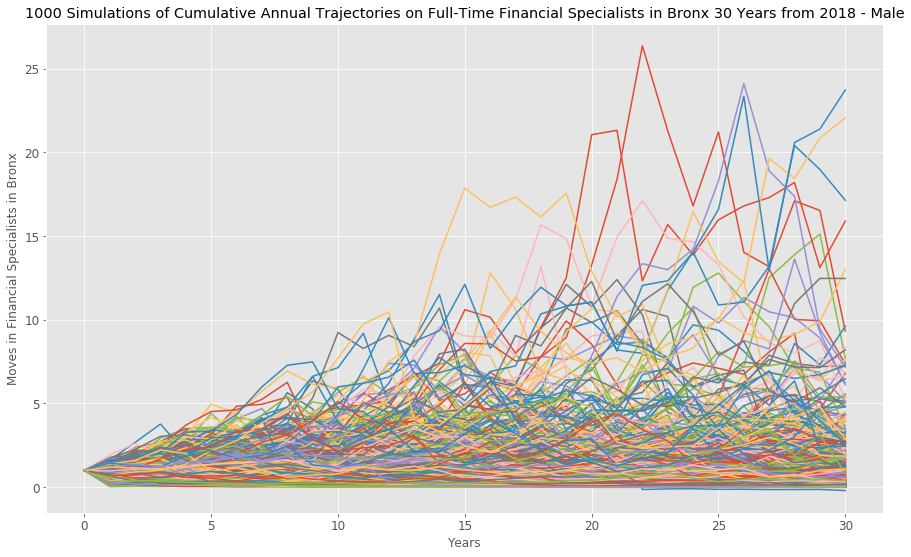

In [135]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_bronx = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Bronx 30 Years from 2018 - Male"
bronx_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Bronx')
plt.show()

In [136]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_bronx.head()

0    0.284799
1    0.401737
2    4.245292
3    1.085278
4    1.179495
Name: 30, dtype: float64

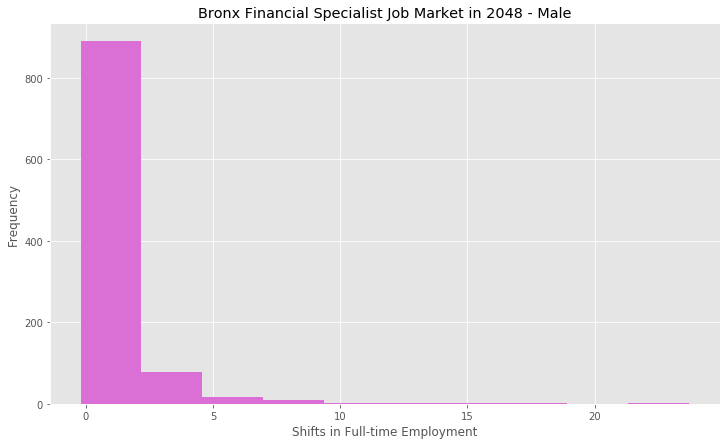

In [137]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', bins=10, color = 'orchid', 
                             title='Bronx Financial Specialist Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [138]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_bronx = ending_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
confidence_interval_bronx

0.025    0.009366
0.975    5.229164
Name: 30, dtype: float64

In [139]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_bronx.value_counts(bins=10) / len(ending_cumulative_moves_bronx)

(-0.225, 2.191]     0.890
(2.191, 4.583]      0.077
(4.583, 6.974]      0.016
(6.974, 9.365]      0.010
(21.321, 23.713]    0.002
(11.756, 14.148]    0.002
(16.539, 18.93]     0.001
(14.148, 16.539]    0.001
(9.365, 11.756]     0.001
(18.93, 21.321]     0.000
Name: 30, dtype: float64

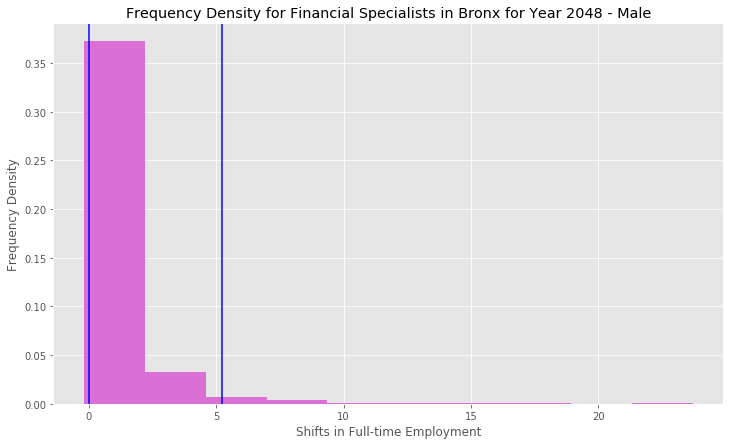

In [140]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_bronx = plt.figure()
ending_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(confidence_interval_bronx.iloc[1], color='blue')
plt.show()

In [141]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_bronx = bronx_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_bronx.head()

0    0.403002
1    0.845839
2    5.573049
3    2.282014
4    0.839815
Name: 11, dtype: float64

In [142]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_bronx = tenth_cumulative_moves_bronx.quantile(q=[0.025, 0.975])
tenth_confidence_interval_bronx

0.025    0.063005
0.975    4.349701
Name: 11, dtype: float64

In [143]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_bronx.value_counts(bins=10) / len(tenth_cumulative_moves_bronx)

(-0.00263, 0.982]    0.620
(0.982, 1.957]       0.238
(1.957, 2.931]       0.073
(2.931, 3.905]       0.036
(3.905, 4.879]       0.014
(4.879, 5.853]       0.010
(5.853, 6.828]       0.005
(8.776, 9.75]        0.002
(7.802, 8.776]       0.001
(6.828, 7.802]       0.001
Name: 11, dtype: float64

In [144]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_bronx = plt.figure()
tenth_cumulative_moves_bronx.plot(kind='hist', density=True, bins=10, color = 'orchid', 
                             title='Frequency Density for Financial Specialists in Bronx for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_bronx.iloc[0], color='blue')
plt.axvline(tenth_confidence_interval_bronx.iloc[1], color='blue')
plt.show()

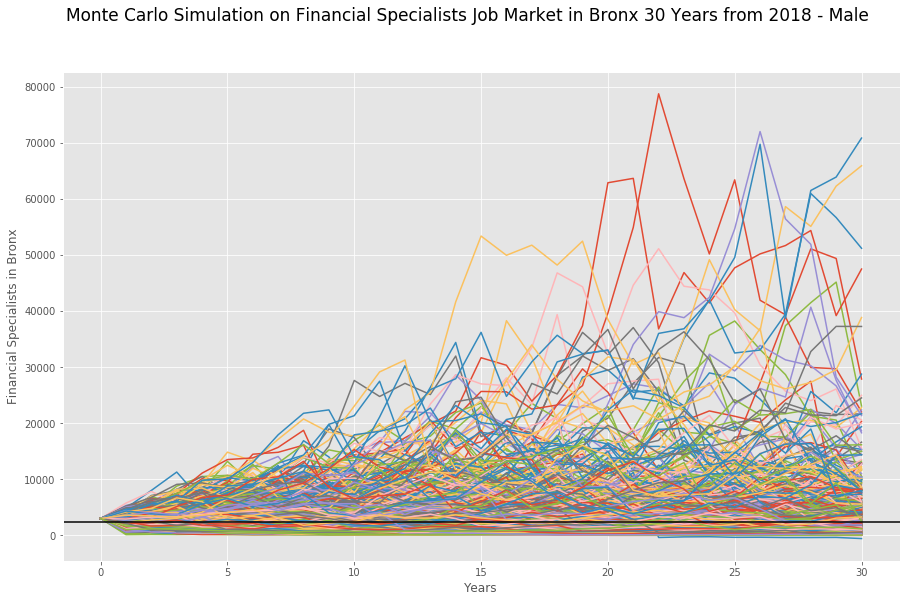

In [145]:
# Set initial investment
initial_employment_bronx = financial_bronx_male_last 

fig_finance_bronx = plt.figure(figsize=(15,9))
fig_finance_bronx.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Bronx 30 Years from 2018 - Male', fontsize=17)
plt.plot(bronx_employed_cumulative_moves*2_988)
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

In [146]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[0]
employment_gnl_upper_bound_bronx = initial_employment_bronx * confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in male financial specialists"
      f" in Bronx over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_bronx:,.0f}k and {employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 2,336k in male financial specialists in Bronx over the next 30 years will end within in the range of 22k and 12,215k.


In [147]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[0]
tenth_employment_gnl_upper_bound_bronx = initial_employment_bronx * tenth_confidence_interval_bronx.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_bronx:,.0f}k in male financial specialists"
      f" in Bronx over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_bronx:,.0f}k and {tenth_employment_gnl_upper_bound_bronx:,.0f}k.")

There is a 95% chance that an initial employment of 2,336k in male financial specialists in Bronx over the next 10 years will end within in the range of 147k and 10,161k.


In [58]:
employed_trajectories_bronx = initial_employment_bronx * bronx_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_bronx.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_bronx

Lower 5%       Median     Upper 5%
0   2336.000000  2336.000000  2336.000000
1   1353.796223  2340.019827  3325.483571
2   1043.959021  2264.578512  3963.682043
3    803.851204  2240.328930  4570.535205
4    714.083603  2103.881226  5018.020223
5    593.090424  2025.280254  5455.869235
6    507.055091  1942.182224  5554.311941
7    440.744507  1833.108552  5946.498118
8    386.917933  1819.147642  6213.497191
9    349.703558  1741.339418  6757.059911
10   320.213334  1671.726521  6717.784190
11   295.688879  1599.072409  7223.754714
12   245.027700  1541.661042  7308.525360
13   224.218632  1506.020333  7767.360778
14   186.636846  1374.184669  7419.638890
15   181.794210  1355.422218  7672.433350
16   172.664961  1291.141020  8252.420564
17   143.845499  1247.532549  8938.235360
18   138.219739  1144.817109  8793.228339
19   124.539559  1123.616733  9216.798940
20   105.628051  1093.513337  9224.579225
21    97.854819  1099.492379  9609.415735
22    94.450859  1058.605636  9180.832573
23    83.066367   988.287408  9689.951350
24    79.537935   942.532493  9452.824973
25    74.507175   894.291377  9501.363978
26    71.587285   865.336083  9739.918623
27    62.373206   806.834455  9669.304789
28    56.043909   775.296921  9848.278865
29    46.755143   761.170325  9883.958357
30    43.958724   735.176608  9232.180904

<Figure size 432x288 with 0 Axes>

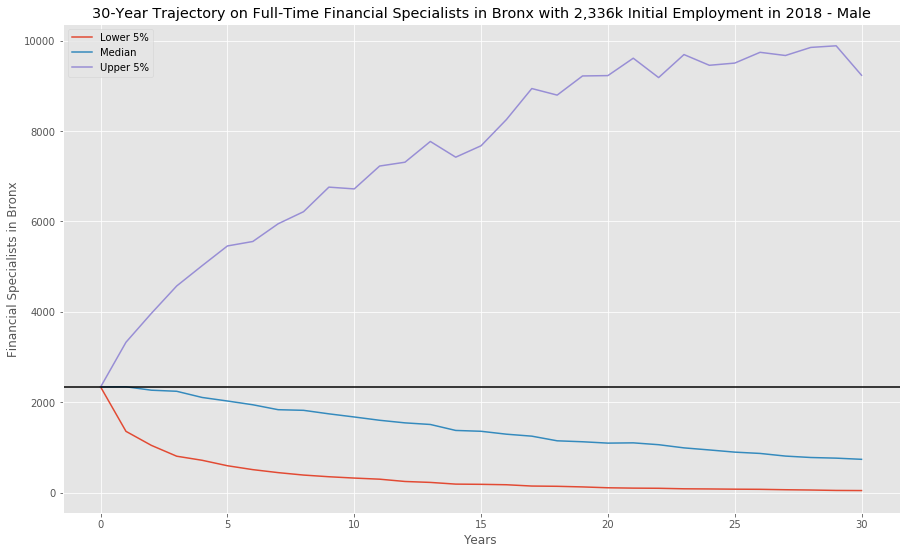

In [153]:
ax_cum_employed_bronx = plt.figure()
employed_trajectories_bronx.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Bronx with 2,336k Initial Employment in 2018 - Male",
                          figsize=(15, 9)),
plt.axhline(y = financial_bronx_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_bronx_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Bronx')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Brooklyn Over 30 Years Starting from 2018

In [60]:
df_brooklyn = financial_specialists_Brooklyn
df_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                     10578.0   
       2011 Kings County, New York                     12407.0   
       2012 Kings County, New York                     10900.0   
       2013 Kings County, New York                     10765.0   
       2014 Kings County, New York                     11821.0   
       2015 Kings County, New York                     10096.0   
       2016 Kings County, New York                     11162.0   
       2017 Kings County, New York                     11608.0   
       2018 Kings County, New York                     11139.0   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                       10787.0  
       2011 Kings County, New York                        9384.0  
       2012 Kings County, New York                       11310.0  
       2013 Kings County, New York                       11266.0  
       2014 Kings County, New York                        8698.0  
       2015 Kings County, New York                       11658.0  
       2016 Kings County, New York                       10285.0  
       2017 Kings County, New York                       11816.0  
       2018 Kings County, New York                       13903.0

In [61]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_brooklyn = df_brooklyn.pct_change().fillna(0)
annual_moves_brooklyn

Financial_specialists_male  \
County Year Name                                                 
047    2010 Kings County, New York                    0.000000   
       2011 Kings County, New York                    0.172906   
       2012 Kings County, New York                   -0.121464   
       2013 Kings County, New York                   -0.012385   
       2014 Kings County, New York                    0.098096   
       2015 Kings County, New York                   -0.145927   
       2016 Kings County, New York                    0.105586   
       2017 Kings County, New York                    0.039957   
       2018 Kings County, New York                   -0.040403   

                                    Financial_specialists_female  
County Year Name                                                  
047    2010 Kings County, New York                      0.000000  
       2011 Kings County, New York                     -0.130064  
       2012 Kings County, New York                      0.205243  
       2013 Kings County, New York                     -0.003890  
       2014 Kings County, New York                     -0.227942  
       2015 Kings County, New York                      0.340308  
       2016 Kings County, New York                     -0.117773  
       2017 Kings County, New York                      0.148858  
       2018 Kings County, New York                      0.176625

In [62]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.mean()['Financial_specialists_male']
avg_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.mean()['Financial_specialists_female']
avg_annual_moves_financial_brooklyn_male

0.01070735087759309

In [63]:
avg_annual_moves_financial_brooklyn_female

0.0434848383701982

In [64]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_brooklyn_male = annual_moves_brooklyn.std()['Financial_specialists_male']
std_dev_annual_moves_financial_brooklyn_female = annual_moves_brooklyn.std()['Financial_specialists_female']
std_dev_annual_moves_financial_brooklyn_male

0.1055144120259476

In [65]:
std_dev_annual_moves_financial_brooklyn_female

0.1860883242930192

In [66]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_brooklyn_male_last  = df_brooklyn['Financial_specialists_male'][-1]
financial_brooklyn_female_last = df_brooklyn['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_brooklyn_employed_df = pd.DataFrame()
brooklyn_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_brooklyn_male = []
    simulated_financial_specialist_brooklyn_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_brooklyn_male = [financial_brooklyn_male_last]
    simulated_financial_specialists_brooklyn_female = [financial_brooklyn_female_last]
    
            
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_brooklyn_male = simulated_financial_specialists_brooklyn_male[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_male, std_dev_annual_moves_financial_brooklyn_male))
        simulated_financial_specialist_brooklyn_female = simulated_financial_specialists_brooklyn_female[count] * (1 + np.random.normal(avg_annual_moves_financial_brooklyn_female, std_dev_annual_moves_financial_brooklyn_female))

        simulated_financial_specialists_brooklyn_male.append(simulated_financial_specialist_brooklyn_male)
        simulated_financial_specialists_brooklyn_female.append(simulated_financial_specialist_brooklyn_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_brooklyn_employed_df['Financial_specialists_male'] = simulated_financial_specialists_brooklyn_male
    simulated_brooklyn_employed_df['Financial_specialists_female'] = simulated_financial_specialists_brooklyn_female
    
    # Calculate the daily returns of simulated prices
    simulated_brooklyn_employed_moves = simulated_brooklyn_employed_df.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    brooklyn_employed_annual_moves = simulated_brooklyn_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    brooklyn_employed_cumulative_moves[n] = (1 + brooklyn_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
brooklyn_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.953049  0.972752  0.962141  1.102934  0.871224  1.122772  0.987912   
2   0.891644  1.045328  0.849823  0.989462  1.052984  1.073061  0.984172   
3   0.954507  1.157976  0.862736  0.968662  1.164491  1.175620  1.010103   
4   1.071766  1.295751  0.782089  1.094507  1.130630  1.189578  1.182203   
5   1.243394  1.138123  0.954181  1.012882  1.298600  1.256315  1.310367   
6   1.261915  1.490014  1.026089  1.024887  1.156883  1.270322  1.327664   
7   1.523727  1.553169  1.111433  1.105592  1.164146  1.345100  1.558402   
8   1.514095  1.611510  1.111358  1.127046  1.222605  1.222500  2.060629   
9   1.690755  1.820590  1.084823  1.044155  1.120200  1.263342  2.011601   
10  1.868374  1.481064  1.277996  1.252659  1.201978  1.224335  2.257191   
11  1.933900  1.692841  1.448279  1.402067  1.227781  1.258540  2.433955   
12  1.493854  1.773138  1.789080  1.321451  1.137678  1.371795  2.328641   
13  1.800558  1.850703  1.770696  1.614759  1.232870  1.434231  2.244665   
14  2.035474  1.862343  1.935929  1.722475  1.410350  1.334038  2.253799   
15  1.891588  1.945595  1.673782  1.758575  1.353034  1.593838  1.938146   
16  1.858655  1.738986  1.565925  1.412616  1.229152  1.499375  1.979335   
17  1.657266  1.860749  1.609710  1.222007  1.048781  1.471965  2.218607   
18  1.617882  2.285548  1.871332  1.152644  1.079524  1.239581  2.465325   
19  1.725342  2.238725  1.609096  1.149586  1.168291  1.207807  2.740001   
20  1.508397  2.216344  1.839762  1.233952  1.203014  1.311012  2.713397   
21  1.477533  1.974373  1.872277  1.205605  1.052095  1.359531  2.988130   
22  1.853610  2.360727  2.172925  1.213326  1.066607  1.347368  3.422340   
23  1.881314  2.269384  1.737152  1.246699  0.874305  1.386183  3.572825   
24  2.003822  2.575443  1.876190  0.990021  0.844227  1.343499  3.419060   
25  2.032943  2.584605  1.952665  0.932222  0.832458  1.205088  3.910438   
26  1.910748  2.274637  1.831389  0.961900  0.865520  1.250647  3.763314   
27  1.716640  1.950004  1.876773  0.964096  0.919007  1.190046  3.769308   
28  1.850840  1.862247  1.546909  0.896614  0.862231  1.364856  3.895415   
29  2.043775  1.745271  1.455479  0.894689  0.750665  1.521576  4.059764   
30  2.228811  1.716198  1.395241  0.892344  0.785115  1.348426  4.892168   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.222254  0.997650  0.861674  ...  1.117019  0.983070  0.896081  1.041078   
2   1.303690  0.991957  0.757947  ...  1.084552  1.234050  0.950870  0.880326   
3   1.597950  0.939845  0.666689  ...  1.122602  1.265317  1.113350  1.015820   
4   1.521206  1.002022  0.704047  ...  1.204314  1.359489  0.857015  0.995826   
5   1.605070  1.039535  0.627239  ...  1.080237  1.406821  0.891459  0.917747   
6   1.804784  1.018756  0.653575  ...  0.892312  1.203172  0.979633  1.129087   
7   1.908365  1.013121  0.766555  ...  0.998932  1.221742  0.997352  1.106889   
8   1.556974  0.904469  0.670821  ...  0.954632  1.089105  1.052823  1.034372   
9   1.347675  1.017744  0.717262  ...  1.120172  1.236223  1.115490  1.059569   
10  1.540270  0.907808  0.599189  ...  1.153568  1.337325  1.039082  0.968676   
11  1.382599  0.805965  0.601735  ...  0.900326  1.536457  0.978895  1.150589   
12  1.413749  0.832525  0.469630  ...  0.880955  1.755037  0.985198  1.433925   
13  1.228914  0.830495  0.465523  ...  1.021482  1.899168  1.132149  1.391470   
14  1.406151  0.700759  0.402386  ...  1.066765  2.133984  1.376220  1.442372   
15  1.465701  0.753593  0.422992  ...  1.021859  2.325681  1.455887  1.415803   
16  1.368969  0.677202  0.454497  ...  1.016593  2.381099  1.390188  1.616120   
17  1.434267  0.682421  0.479411  ...  1.122728  2.334930  1.248186  1.563075   
18  1.433385  0.748020  0.449561  ...

In [67]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_brooklyn = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Brooklyn 30 Years from 2018 - Male"
brooklyn_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Brooklyn')
plt.show()

<Figure size 432x288 with 0 Axes>

In [68]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_brooklyn.head()

0    2.228811
1    1.716198
2    1.395241
3    0.892344
4    0.785115
Name: 30, dtype: float64

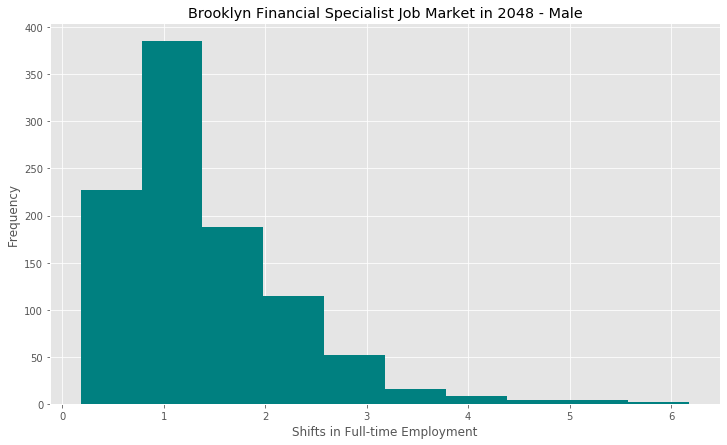

In [69]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', bins=10, color = 'Teal', 
                             title='Brooklyn Financial Specialist Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [70]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_brooklyn = ending_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
confidence_interval_brooklyn

0.025    0.389720
0.975    3.408863
Name: 30, dtype: float64

In [71]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
ending_cumulative_moves_brooklyn.value_counts(bins=10) / len(ending_cumulative_moves_brooklyn)

(0.78, 1.38]      0.385
(0.173, 0.78]     0.227
(1.38, 1.98]      0.188
(1.98, 2.581]     0.114
(2.581, 3.181]    0.052
(3.181, 3.781]    0.016
(3.781, 4.381]    0.008
(4.981, 5.581]    0.004
(4.381, 4.981]    0.004
(5.581, 6.182]    0.002
Name: 30, dtype: float64

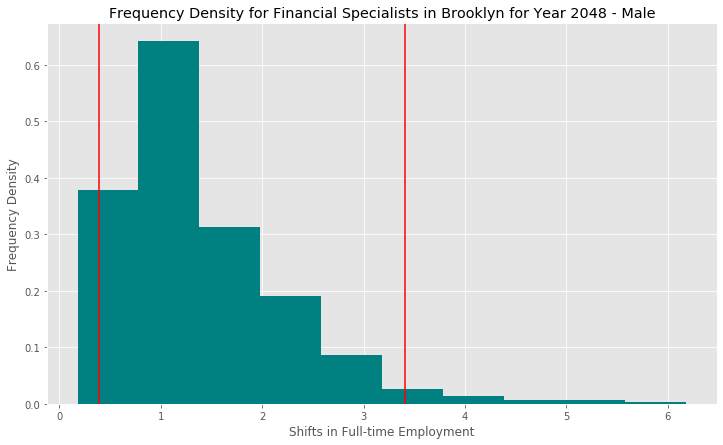

In [72]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_cum_moves_brooklyn = plt.figure()
ending_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

In [73]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_brooklyn = brooklyn_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_brooklyn.head()

0    1.933900
1    1.692841
2    1.448279
3    1.402067
4    1.227781
Name: 11, dtype: float64

In [74]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_brooklyn = tenth_cumulative_moves_brooklyn.quantile(q=[0.025, 0.975])
tenth_confidence_interval_brooklyn

0.025    0.522227
0.975    2.172571
Name: 11, dtype: float64

In [75]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative employment ranges
tenth_cumulative_moves_brooklyn.value_counts(bins=10) / len(tenth_cumulative_moves_brooklyn)

(0.876, 1.134]    0.294
(0.619, 0.876]    0.230
(1.134, 1.392]    0.209
(1.392, 1.65]     0.104
(0.357, 0.619]    0.061
(1.65, 1.907]     0.052
(1.907, 2.165]    0.024
(2.165, 2.423]    0.019
(2.423, 2.68]     0.006
(2.68, 2.938]     0.001
Name: 11, dtype: float64

In [76]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
hist_tenth_cum_moves_brooklyn = plt.figure()
tenth_cumulative_moves_brooklyn.plot(kind='hist', density=True, bins=10, color = 'teal', 
                             title='Frequency Density for Financial Specialists in Brooklyn for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[0], color='red')
plt.axvline(tenth_confidence_interval_brooklyn.iloc[1], color='red')
plt.show()

In [77]:
# Set initial employment
initial_employment_brooklyn = financial_brooklyn_male_last 

# Plot scaled monte-carlo simulation for Brooklyn job market
fig_finance_brooklyn = plt.figure(figsize=(15,9))
fig_finance_brooklyn.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Brooklyn 30 Years from 2018 - Male', fontsize=17)
plt.plot(brooklyn_employed_cumulative_moves * initial_employment_brooklyn)
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

In [78]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[0]
employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in male financial specialists"
      f" in Brooklyn over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_brooklyn:,.0f}k and {employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 11,139k in male financial specialists in Brooklyn over the next 30 years will end within in the range of 4,341k and 37,971k.


In [149]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[0]
tenth_employment_gnl_upper_bound_brooklyn = initial_employment_brooklyn * tenth_confidence_interval_brooklyn.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_brooklyn:,.0f}k in male financial specialists"
      f" in Brooklyn over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_brooklyn:,.0f}k and {tenth_employment_gnl_upper_bound_brooklyn:,.0f}k.")

There is a 95% chance that an initial employment of 11,139k in male financial specialists in Brooklyn over the next 10 years will end within in the range of 5,817k and 24,200k.


In [79]:
employed_trajectories_brooklyn = initial_employment_brooklyn * brooklyn_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_brooklyn.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_brooklyn

Lower 5%        Median      Upper 5%
0   11139.000000  11139.000000  11139.000000
1    9372.391425  11172.884538  13124.699356
2    8747.520246  11289.068344  14124.120850
3    8297.976265  11303.738101  14938.759538
4    7994.949152  11490.115339  15897.167787
5    7832.967030  11503.008032  16859.105172
6    7533.928402  11464.872204  17392.083639
7    7204.079670  11569.048354  18174.055231
8    7164.299006  11744.967424  18956.409488
9    6932.414614  11777.203156  19842.996774
10   6760.063730  11818.051182  20172.004086
11   6702.343018  11830.050977  21108.898305
12   6463.860753  11969.978302  21047.073845
13   6301.616720  12247.813000  22544.453444
14   6217.251384  12378.824650  22819.669874
15   6209.205360  12363.447300  23821.351917
16   6053.962815  12454.347702  24599.718010
17   5937.731081  12494.350228  25497.006559
18   5869.512347  12335.940853  25564.577960
19   5710.876746  12607.541927  26498.124892
20   5657.983599  12387.265031  26605.142104
21   5740.327760  12618.679957  26567.696765
22   5622.114314  12581.323064  27406.950954
23   5418.397941  12721.329645  28320.551227
24   5479.811394  12846.266882  29163.578736
25   5434.480364  12914.142472  30263.286399
26   5447.230635  12986.757113  29809.540856
27   5274.072243  13216.615363  31002.538383
28   5145.794626  13081.629095  31732.221653
29   5176.028953  13234.213089  31517.231455
30   5038.833660  13616.873389  33056.015136

In [152]:
ax_cum_employed_brooklyn = plt.figure()
employed_trajectories_brooklyn.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Brooklyn with 11,139k Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = financial_brooklyn_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_brooklyn_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Brooklyn')
plt.show()

<Figure size 432x288 with 0 Axes>

### Monte Carlo Simulation on Full-Time Financial Specialists in Queens Over 30 Years Starting from 2018

In [81]:
df_queens = financial_specialists_Queens
df_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                     12474.0   
       2011 Queens County, New York                     12283.0   
       2012 Queens County, New York                     12352.0   
       2013 Queens County, New York                     12428.0   
       2014 Queens County, New York                     11948.0   
       2015 Queens County, New York                     13864.0   
       2016 Queens County, New York                     12805.0   
       2017 Queens County, New York                     14777.0   
       2018 Queens County, New York                     11494.0   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                       13008.0  
       2011 Queens County, New York                       12396.0  
       2012 Queens County, New York                       12281.0  
       2013 Queens County, New York                       14374.0  
       2014 Queens County, New York                       13265.0  
       2015 Queens County, New York                       14109.0  
       2016 Queens County, New York                       13697.0  
       2017 Queens County, New York                       13611.0  
       2018 Queens County, New York                       13281.0

In [82]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_queens = df_queens.pct_change().fillna(0)
annual_moves_queens

Financial_specialists_male  \
County Year Name                                                  
081    2010 Queens County, New York                    0.000000   
       2011 Queens County, New York                   -0.015312   
       2012 Queens County, New York                    0.005618   
       2013 Queens County, New York                    0.006153   
       2014 Queens County, New York                   -0.038622   
       2015 Queens County, New York                    0.160362   
       2016 Queens County, New York                   -0.076385   
       2017 Queens County, New York                    0.154002   
       2018 Queens County, New York                   -0.222170   

                                     Financial_specialists_female  
County Year Name                                                   
081    2010 Queens County, New York                      0.000000  
       2011 Queens County, New York                     -0.047048  
       2012 Queens County, New York                     -0.009277  
       2013 Queens County, New York                      0.170426  
       2014 Queens County, New York                     -0.077153  
       2015 Queens County, New York                      0.063626  
       2016 Queens County, New York                     -0.029201  
       2017 Queens County, New York                     -0.006279  
       2018 Queens County, New York                     -0.024245

In [83]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_queens_male = annual_moves_queens.mean()['Financial_specialists_male']
avg_annual_moves_financial_queens_female = annual_moves_queens.mean()['Financial_specialists_female']
avg_annual_moves_financial_queens_male

-0.0029282782346636343

In [84]:
avg_annual_moves_financial_queens_female

0.004538725855711283

In [85]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_queens_male = annual_moves_queens.std()['Financial_specialists_male']
std_dev_annual_moves_financial_queens_female = annual_moves_queens.std()['Financial_specialists_female']
std_dev_annual_moves_financial_queens_male

0.11529577070807671

In [86]:
std_dev_annual_moves_financial_queens_female

0.07300685227824968

In [87]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_queens_male_last  = df_queens['Financial_specialists_male'][-1]
financial_queens_female_last = df_queens['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_queens_employed_df = pd.DataFrame()
queens_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_queens_male = []
    simulated_financial_specialist_queens_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_queens_male = [financial_queens_male_last]
    simulated_financial_specialists_queens_female = [financial_queens_female_last]
    
            
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_queens_male = simulated_financial_specialists_queens_male[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_male, std_dev_annual_moves_financial_queens_male))
        simulated_financial_specialist_queens_female = simulated_financial_specialists_queens_female[count] * (1 + np.random.normal(avg_annual_moves_financial_queens_female, std_dev_annual_moves_financial_queens_female))

        simulated_financial_specialists_queens_male.append(simulated_financial_specialist_queens_male)
        simulated_financial_specialists_queens_female.append(simulated_financial_specialist_queens_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_queens_employed_df['Financial_specialists_male'] = simulated_financial_specialists_queens_male
    simulated_queens_employed_df['Financial_specialists_female'] = simulated_financial_specialists_queens_female
    
    # Calculate the daily returns of simulated prices
    simulated_queens_employed_moves = simulated_queens_employed_df.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    queens_employed_annual_moves = simulated_queens_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    queens_employed_cumulative_moves[n] = (1 + queens_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
queens_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.890091  1.025222  1.078891  1.118340  0.992315  1.173504  1.135226   
2   0.988154  1.118764  1.163466  1.322140  1.004682  1.290912  0.967534   
3   0.867041  1.282959  1.003701  1.282529  1.283501  1.372035  0.960529   
4   0.707802  1.198131  0.900181  0.998737  1.483073  1.507866  0.686322   
5   0.680284  1.682726  0.923349  1.068278  1.368540  1.677967  0.702027   
6   0.695072  1.841513  0.988393  0.955692  1.149180  1.475820  0.642582   
7   0.676898  1.718091  0.804560  0.884629  1.115586  1.360708  0.668396   
8   0.654472  1.719072  0.801370  0.750020  1.062982  1.381609  0.648096   
9   0.612605  1.725091  0.699558  0.843008  1.084905  1.334514  0.651272   
10  0.708818  1.643905  0.777634  0.802541  0.990651  1.249924  0.661052   
11  0.725877  1.734980  0.756231  0.959368  0.808063  1.564445  0.647036   
12  0.732028  1.605393  0.835113  0.774454  0.865181  1.580734  0.771113   
13  0.821062  1.700326  0.684655  0.931461  0.916061  1.540371  0.879197   
14  0.625317  1.969921  0.729494  0.949263  1.051813  1.239104  0.918830   
15  0.695972  2.302327  0.626691  0.985446  1.163290  1.138859  0.798841   
16  0.656316  2.269828  0.527230  1.037364  1.269518  1.001497  0.993784   
17  0.730828  2.337615  0.433457  1.055359  1.303351  1.024884  0.927733   
18  0.666248  2.449806  0.403330  1.282100  1.444793  0.809368  1.019578   
19  0.586132  2.363076  0.373982  1.264511  1.261137  0.919813  1.129056   
20  0.519183  2.000176  0.362857  1.300222  1.254117  0.987746  1.016435   
21  0.513229  2.303532  0.381353  1.181602  1.191960  1.140804  1.105281   
22  0.504509  2.095754  0.314391  1.218590  1.052906  1.043890  0.966393   
23  0.559215  1.828775  0.309592  1.165347  0.997997  1.003326  0.908005   
24  0.565106  2.040501  0.305693  0.937527  0.971745  0.980843  0.903277   
25  0.492695  2.006315  0.305948  0.921084  1.145809  0.938909  0.944793   
26  0.541951  1.558266  0.284253  0.851289  1.021495  0.966857  0.932943   
27  0.663611  1.488685  0.291356  0.876821  1.154648  0.937393  0.785378   
28  0.587752  1.469774  0.331547  0.683847  1.230308  1.010840  0.750586   
29  0.646122  1.088044  0.299795  0.760644  1.278696  0.915521  0.883419   
30  0.516448  1.061929  0.280776  0.720248  1.304878  0.779803  0.918917   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.083598  0.947784  0.895624  ...  0.953164  0.972682  0.995208  1.171421   
2   1.136703  0.996958  0.770490  ...  0.935558  0.908819  0.997768  1.457694   
3   1.279797  0.999614  0.844764  ...  0.795494  0.862350  1.019609  1.316514   
4   1.192986  0.855738  0.878005  ...  0.832557  0.891603  0.953939  1.467193   
5   1.319935  0.915918  0.705163  ...  0.825478  0.960935  1.081169  1.541111   
6   1.280982  0.950859  0.676663  ...  1.039350  0.840681  1.089466  1.484638   
7   1.412959  0.807626  0.659885  ...  1.039841  0.966631  1.245863  1.657107   
8   1.292626  0.975823  0.647767  ...  1.312823  0.751209  1.173541  1.873631   
9   1.144186  1.043623  0.677740  ...  1.201285  0.683428  1.214789  1.870245   
10  1.022451  1.210244  0.806632  ...  1.253225  0.704298  1.150162  1.845706   
11  1.095627  1.261812  0.652245  ...  1.151718  0.757908  1.149732  1.659121   
12  1.022871  1.174135  0.597607  ...  1.043033  0.704764  1.046617  1.819569   
13  0.982354  1.077264  0.533728  ...  1.062311  0.670214  1.057365  1.695568   
14  0.832049  0.972862  0.527015  ...  1.085156  0.611366  0.954178  1.411791   
15  0.783275  1.113823  0.553530  ...  0.885632  0.573873  1.092703  1.439444   
16  0.683326  1.258203  0.507233  ...  0.844500  0.688542  1.219649  1.467502   
17  0.637865  1.223196  0.527679  ...  0.952791  0.693720  1.176580  1.423629   
18  0.673435  1.215272  0.417464  ...

In [88]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_queens = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Queens 30 Years from 2018 - Male"
queens_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Queens')
plt.show()

<Figure size 432x288 with 0 Axes>

In [89]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_queens.head()

0    0.516448
1    1.061929
2    0.280776
3    0.720248
4    1.304878
Name: 30, dtype: float64

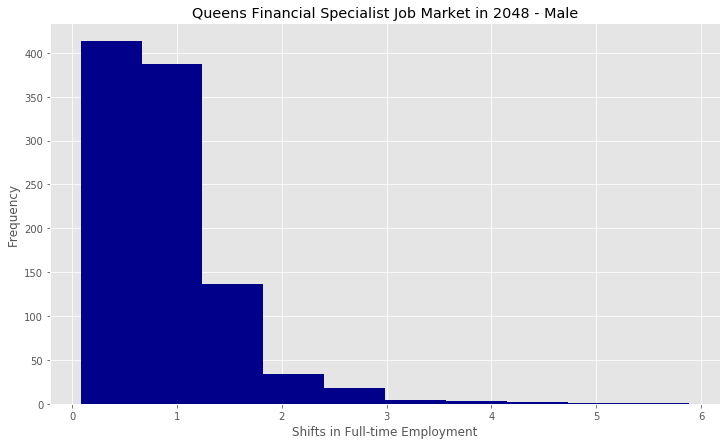

In [90]:
# Use the `plot` function to plot a frequency distribution of simulated ending employment
fig_hist_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', bins=10, color = 'darkblue', 
                             title='Queens Financial Specialist Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [91]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_queens = ending_cumulative_moves_queens.quantile(q=[0.025, 0.975])
confidence_interval_queens

0.025    0.203155
0.975    2.521821
Name: 30, dtype: float64

In [92]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_queens.value_counts(bins=10) / len(ending_cumulative_moves_queens)

(0.075, 0.663]    0.413
(0.663, 1.243]    0.387
(1.243, 1.824]    0.137
(1.824, 2.405]    0.034
(2.405, 2.985]    0.018
(2.985, 3.566]    0.004
(3.566, 4.147]    0.003
(4.147, 4.728]    0.002
(5.308, 5.889]    0.001
(4.728, 5.308]    0.001
Name: 30, dtype: float64

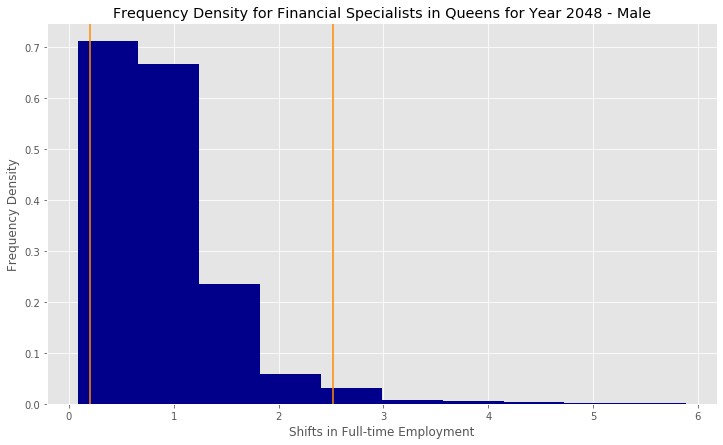

In [93]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_queens = plt.figure()
ending_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

In [94]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_queens = queens_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_queens.head()

0    0.725877
1    1.734980
2    0.756231
3    0.959368
4    0.808063
Name: 11, dtype: float64

In [95]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_queens = tenth_cumulative_moves_queens.quantile(q=[0.025, 0.975])
tenth_confidence_interval_queens

0.025    0.418948
0.975    1.886027
Name: 11, dtype: float64

In [96]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_queens.value_counts(bins=10) / len(tenth_cumulative_moves_queens)

(0.701, 0.929]    0.305
(0.474, 0.701]    0.198
(0.929, 1.156]    0.197
(1.156, 1.383]    0.113
(1.383, 1.61]     0.069
(0.244, 0.474]    0.052
(1.61, 1.837]     0.036
(1.837, 2.065]    0.018
(2.292, 2.519]    0.006
(2.065, 2.292]    0.006
Name: 11, dtype: float64

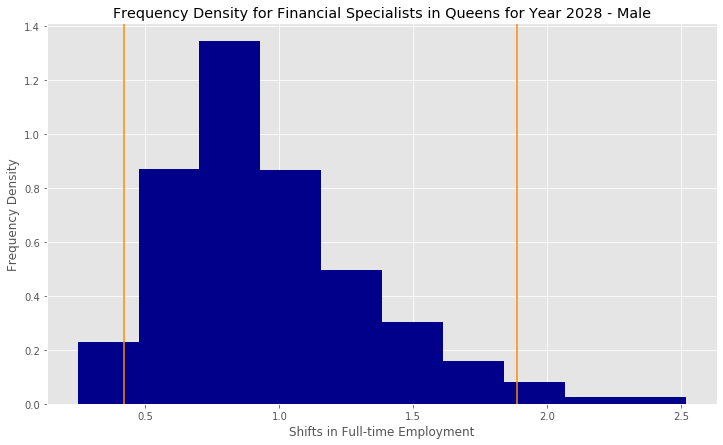

In [97]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_queens = plt.figure()
tenth_cumulative_moves_queens.plot(kind='hist', density=True, bins=10, color = 'darkblue', 
                             title='Frequency Density for Financial Specialists in Queens for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_queens.iloc[0], color='darkorange')
plt.axvline(tenth_confidence_interval_queens.iloc[1], color='darkorange')
plt.show()

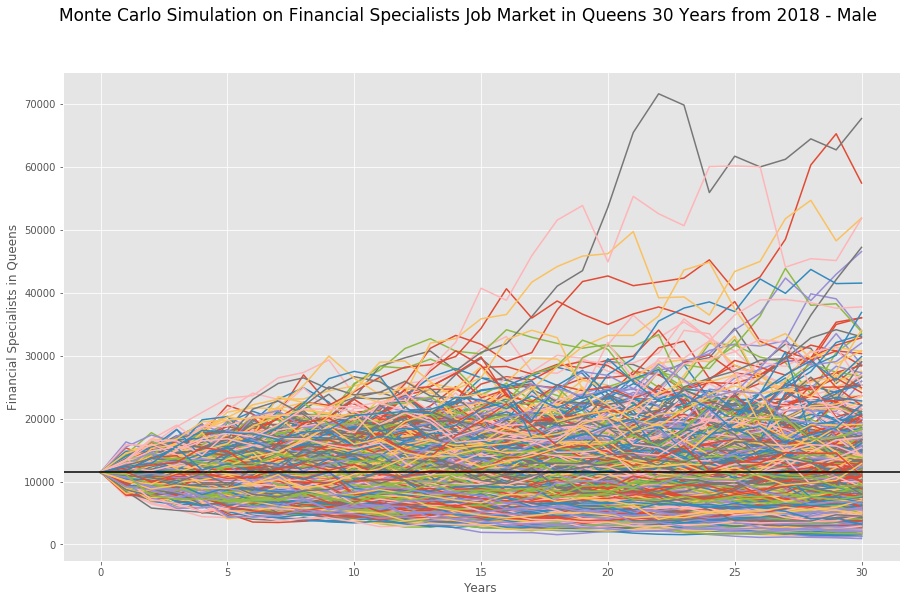

In [98]:
# Set initial employment
initial_employment_queens = financial_queens_male_last 

fig_finance_queens = plt.figure(figsize=(15,9))
fig_finance_queens.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Queens 30 Years from 2018 - Male', fontsize=17)
plt.plot(queens_employed_cumulative_moves * initial_employment_queens)
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

In [99]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[0]
employment_gnl_upper_bound_queens = initial_employment_queens * confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in male financial specialists"
      f" in Queens over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_queens:,.0f}k and {employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 11,494k in male financial specialists in Queens over the next 30 years will end within in the range of 2,335k and 28,986k.


In [100]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[0]
tenth_employment_gnl_upper_bound_queens = initial_employment_queens * tenth_confidence_interval_queens.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_queens:,.0f}k in male financial specialists"
      f" in Queens over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_queens:,.0f}k and {tenth_employment_gnl_upper_bound_queens:,.0f}k.")

There is a 95% chance that an initial employment of 11,494k in male financial specialists in Queens over the next 10 years will end within in the range of 4,815k and 21,678k.


In [101]:
employed_trajectories_queens = initial_employment_queens * queens_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_queens.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_queens

Lower 5%        Median      Upper 5%
0   11494.000000  11494.000000  11494.000000
1    9226.617333  11422.044179  13668.988269
2    8362.328243  11502.523209  14651.809567
3    7943.081615  11437.534102  15273.693000
4    7409.867539  11212.000300  15739.797091
5    6959.268084  11147.038172  16494.754567
6    6516.095010  10868.777597  17242.319864
7    6416.154766  10924.329074  17693.430461
8    6146.546973  10750.799160  18074.103543
9    5786.323685  10626.303750  18419.290089
10   5609.713820  10344.145171  18871.616750
11   5441.659222  10153.549582  19266.895095
12   5301.358866  10205.843170  20360.779186
13   5060.639142  10149.061857  20021.043776
14   4555.925070  10093.276750  19943.732873
15   4406.078175   9980.433157  20052.763179
16   4115.072812   9970.352223  20323.600565
17   4002.877987   9870.983823  20019.695405
18   3909.338844   9855.296793  20823.392122
19   3790.845466   9798.761375  20338.068385
20   3775.171771   9495.387543  21152.278390
21   3851.530868   9316.220035  21442.115454
22   3620.654748   9305.833741  21156.238193
23   3398.062592   9295.544874  21833.769220
24   3360.072888   9341.594309  21909.564858
25   3231.783580   9207.625862  22413.334495
26   3084.042844   9101.641500  21855.329561
27   3061.484061   9061.954340  22283.441538
28   2882.352572   8844.747141  22385.234988
29   2979.602334   8803.242311  22717.989475
30   2982.427198   8548.531482  22810.404402

<Figure size 432x288 with 0 Axes>

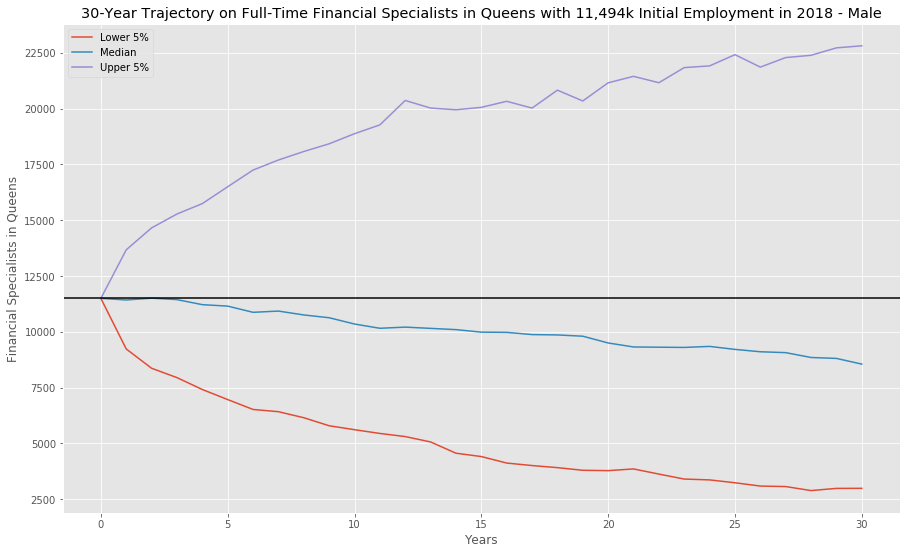

In [151]:
ax_cum_employed_queens = plt.figure()
employed_trajectories_queens.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Queens with 11,494k Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = financial_queens_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_queens_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Queens')
plt.show()

### Monte Carlo Simulation on Full-Time Financial Specialists in Staten Island Over 30 Years Starting from 2018

In [103]:
df_staten = financial_specialists_Staten_Island
df_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                      2906.0   
       2011 Richmond County, New York                      3572.0   
       2012 Richmond County, New York                      2745.0   
       2013 Richmond County, New York                      3765.0   
       2014 Richmond County, New York                      3114.0   
       2015 Richmond County, New York                      2924.0   
       2016 Richmond County, New York                      3704.0   
       2017 Richmond County, New York                      3274.0   
       2018 Richmond County, New York                      3342.0   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                        1931.0  
       2011 Richmond County, New York                        1964.0  
       2012 Richmond County, New York                        2989.0  
       2013 Richmond County, New York                        2190.0  
       2014 Richmond County, New York                        1606.0  
       2015 Richmond County, New York                        2988.0  
       2016 Richmond County, New York                        1802.0  
       2017 Richmond County, New York                        2378.0  
       2018 Richmond County, New York                        3495.0

In [104]:
# Use the `pct_change` function to calculate daily returns of `male` and `female`.
annual_moves_staten = df_staten.pct_change().fillna(0)
annual_moves_staten

Financial_specialists_male  \
County Year Name                                                    
085    2010 Richmond County, New York                    0.000000   
       2011 Richmond County, New York                    0.229181   
       2012 Richmond County, New York                   -0.231523   
       2013 Richmond County, New York                    0.371585   
       2014 Richmond County, New York                   -0.172908   
       2015 Richmond County, New York                   -0.061015   
       2016 Richmond County, New York                    0.266758   
       2017 Richmond County, New York                   -0.116091   
       2018 Richmond County, New York                    0.020770   

                                       Financial_specialists_female  
County Year Name                                                     
085    2010 Richmond County, New York                      0.000000  
       2011 Richmond County, New York                      0.017090  
       2012 Richmond County, New York                      0.521894  
       2013 Richmond County, New York                     -0.267313  
       2014 Richmond County, New York                     -0.266667  
       2015 Richmond County, New York                      0.860523  
       2016 Richmond County, New York                     -0.396921  
       2017 Richmond County, New York                      0.319645  
       2018 Richmond County, New York                      0.469722

In [105]:
# Use the `mean` function to calculate the mean of market shifts for `male` and `female`, respectively
avg_annual_moves_financial_staten_male = annual_moves_staten.mean()['Financial_specialists_male']
avg_annual_moves_financial_staten_female = annual_moves_staten.mean()['Financial_specialists_female']
avg_annual_moves_financial_staten_male

0.034084051475437804

In [106]:
avg_annual_moves_financial_staten_female

0.13977476125003532

In [107]:
# Use the `std` function to calculate the standard deviation of market moves for `male` and `female`, respectively
std_dev_annual_moves_financial_staten_male = annual_moves_staten.std()['Financial_specialists_male']
std_dev_annual_moves_financial_staten_female = annual_moves_staten.std()['Financial_specialists_female']
std_dev_annual_moves_financial_staten_male

0.2098912804193371

In [108]:
std_dev_annual_moves_financial_staten_female

0.4272379980869996

In [109]:
# Set number of simulations and trading days
num_simulations = 1000
num_years = 30

# Set last employment figures of `Software_devops_male` and `Software_devops_female`
financial_staten_male_last  = df_staten['Financial_specialists_male'][-1]
financial_staten_female_last = df_staten['Financial_specialists_female'][-1]
# financial_specialists_female_last = df['Financial_specialists_female'][-1]

# Initialize empty DataFrame to hold simulated employment data for each simulation
simulated_staten_employed_df = pd.DataFrame()
staten_employed_cumulative_moves = pd.DataFrame()

# Run the simulation of projecting employment for the next 30 years, `1000` times
for n in range(num_simulations):
    
    count = 0
    
    simulated_financial_specialist_staten_male = []
    simulated_financial_specialist_staten_female = []

    # Initialize the simulated prices list with the last employmentdata of `Software_devops_male` and `Software_devops_female`
    simulated_financial_specialists_staten_male = [financial_staten_male_last]
    simulated_financial_specialists_staten_female = [financial_staten_female_last]
    
            
    
    # Simulate the returns for 30 years
    for i in range(num_years):
        
        if count == 30:
            break
            
        simulated_financial_specialist_staten_male = simulated_financial_specialists_staten_male[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_male, std_dev_annual_moves_financial_staten_male))
        simulated_financial_specialist_staten_female = simulated_financial_specialists_staten_female[count] * (1 + np.random.normal(avg_annual_moves_financial_staten_female, std_dev_annual_moves_financial_staten_female))

        simulated_financial_specialists_staten_male.append(simulated_financial_specialist_staten_male)
        simulated_financial_specialists_staten_female.append(simulated_financial_specialist_staten_female)
        
        count += 1
            
    # Append a simulated prices of each simulation to DataFrame
    simulated_staten_employed_df['Financial_specialists_male'] = simulated_financial_specialists_staten_male
    simulated_staten_employed_df['Financial_specialists_female'] = simulated_financial_specialists_staten_female
    
    # Calculate the daily returns of simulated prices
    simulated_staten_employed_moves = simulated_staten_employed_df.pct_change()
    
    # Set the portfolio weights (100% male; 0% female)
    weights = [1.0, 0.0]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    staten_employed_annual_moves = simulated_staten_employed_moves.dot(weights)
    
    # Calculate the normalized, cumulative return series
    staten_employed_cumulative_moves[n] = (1 + staten_employed_annual_moves.fillna(0)).cumprod()

# Print records from the DataFrame
staten_employed_cumulative_moves

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.963248  0.831581  1.172997  0.973339  1.038079  0.926184  1.037684   
2   1.089171  1.120819  1.368624  0.777362  1.250221  1.027925  1.085264   
3   0.793411  1.329384  1.154177  0.514137  1.048793  1.283002  1.133146   
4   0.686088  1.726642  1.607077  0.578760  1.124622  0.738591  1.162029   
5   0.639623  1.707900  1.227627  0.567243  1.133337  0.780721  1.559338   
6   0.677511  1.445873  1.637850  0.671265  1.394799  0.767310  1.373360   
7   0.851568  1.532363  1.782747  0.593834  1.312125  0.852388  1.140593   
8   0.799214  1.295996  1.460194  0.495660  1.240763  0.635490  1.223697   
9   0.831434  1.280256  1.419004  0.495467  1.058480  0.580832  1.268192   
10  0.997996  1.100958  1.367113  0.725768  1.104122  0.772927  1.013960   
11  1.079435  0.932977  1.540169  0.463449  1.523773  0.991159  1.110620   
12  1.087750  1.258755  1.772405  0.585005  1.293145  0.606255  1.168555   
13  0.830287  1.153819  1.514235  0.725426  1.629491  0.246809  1.335632   
14  0.943926  1.653554  1.700991  0.667457  1.855871  0.243376  1.493498   
15  1.250124  2.400529  2.635252  0.964311  1.024697  0.305247  1.482719   
16  0.960819  1.914204  2.643950  1.054676  1.083549  0.423356  0.996182   
17  0.676298  2.124982  2.266507  1.539798  1.223419  0.467915  1.059694   
18  0.699683  2.101541  2.764331  2.176405  1.084779  0.425811  1.398844   
19  0.942391  2.524032  3.322543  1.629365  1.320891  0.531291  1.778738   
20  1.025174  2.803060  4.011708  1.700405  0.681156  0.460955  2.184204   
21  0.885920  1.885405  3.523990  1.327775  0.486370  0.385902  1.282427   
22  1.222467  1.959620  3.825832  1.352401  0.396276  0.567960  1.235634   
23  1.428957  1.379997  3.864025  0.972513  0.403716  0.547629  1.497674   
24  0.610802  1.623534  3.143242  0.797677  0.487286  0.503012  2.002449   
25  0.641713  1.908597  2.593754  0.706980  0.424868  0.635516  2.096187   
26  0.516134  2.444143  2.115081  0.546772  0.510398  0.533120  2.212048   
27  0.347701  1.640356  2.193463  0.610028  0.639891  0.537705  2.553442   
28  0.471666  1.343465  2.700044  0.802878  0.640390  0.511935  2.151739   
29  0.576531  1.744370  2.927053  0.797446  0.765093  0.714859  1.756244   
30  0.684710  1.265577  2.891610  0.820282  0.604062  0.718542  1.796213   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.963526  0.765845  1.089613  ...  1.335839  1.394286  0.968919  1.279683   
2   0.893880  0.699913  1.230763  ...  1.408699  1.574753  1.180194  1.181094   
3   1.041304  0.926235  1.224844  ...  1.819878  1.579492  1.165867  1.311651   
4   0.701100  1.048096  1.700036  ...  1.740761  1.701938  1.667445  1.141317   
5   0.728151  0.852326  1.430151  ...  1.585197  1.900728  1.903545  1.126200   
6   0.745321  0.848723  1.695570  ...  1.517813  1.219690  1.673983  0.809774   
7   1.067533  0.816823  1.219862  ...  1.335525  1.147155  1.251612  0.928046   
8   0.836638  0.842738  1.625822  ...  1.475619  0.885307  1.033918  0.595743   
9   1.038184  0.906141  1.514245  ...  1.124961  0.979964  0.971857  0.484935   
10  1.183605  0.831979  1.379519  ...  0.936292  1.002359  1.019105  0.519299   
11  1.205130  0.880948  1.612190  ...  1.138525  1.283176  0.965015  0.622355   
12  1.001402  0.999412  2.159979  ...  1.334868  1.329124  0.756837  0.628248   
13  0.428651  1.248009  1.992027  ...  1.519516  1.301158  0.420012  0.737154   
14  0.471019  1.459096  2.200821  ...  0.898152  1.310520  0.436748  0.695893   
15  0.244608  1.871713  2.141006  ...  1.053248  1.296726  0.469482  0.800898   
16  0.289620  1.751969  2.765759  ...  1.273266  1.609924  0.513967  0.964045   
17  0.266656  1.729871  2.519260  ...  1.273148  1.583679  0.496291  1.036560   
18  0.237304  1.412086  1.423967  ...

<Figure size 432x288 with 0 Axes>

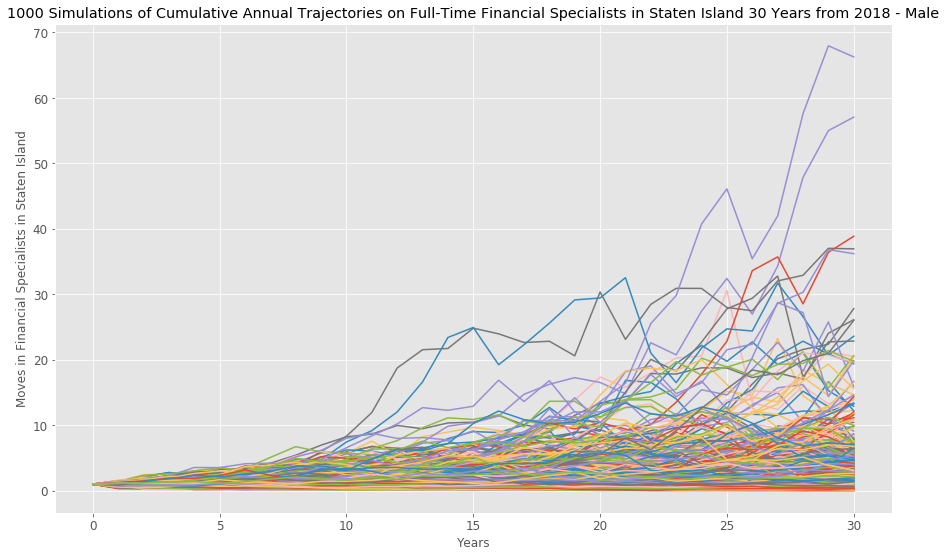

In [110]:
# Use the `plot` function to plot `1000` simulations of the potential trajectories of the employment on software developers based on a year
monte_carlo_cum_moves_staten = plt.figure()
plot_title = f"{n+1} Simulations of Cumulative Annual Trajectories on Full-Time Financial Specialists in Staten Island 30 Years from 2018 - Male"
staten_employed_cumulative_moves.plot(legend=None, title=plot_title, figsize=(15, 9), fontsize=12)
plt.xlabel('Years')
plt.ylabel('Moves in Financial Specialists in Staten Island')
plt.show()

In [111]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
ending_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-1, :]
ending_cumulative_moves_staten.head()

0    0.684710
1    1.265577
2    2.891610
3    0.820282
4    0.604062
Name: 30, dtype: float64

In [112]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
fig_hist_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', bins=10, color = 'coral', 
                             title='Staten Financial Specialist Job Market in 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.show()

In [113]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
confidence_interval_staten = ending_cumulative_moves_staten.quantile(q=[0.025, 0.975])
confidence_interval_staten

0.025     0.117259
0.975    13.968754
Name: 30, dtype: float64

In [114]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
ending_cumulative_moves_staten.value_counts(bins=10) / len(ending_cumulative_moves_staten)

(-0.0375, 6.653]    0.924
(6.653, 13.277]     0.047
(13.277, 19.9]      0.016
(19.9, 26.523]      0.007
(33.147, 39.77]     0.003
(59.64, 66.264]     0.001
(53.017, 59.64]     0.001
(26.523, 33.147]    0.001
(46.394, 53.017]    0.000
(39.77, 46.394]     0.000
Name: 30, dtype: float64

In [115]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_cum_moves_staten = plt.figure()
ending_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2048 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

In [116]:
# Select the last row for project employment (employent statistics of each simulation on the last year)
tenth_cumulative_moves_staten = staten_employed_cumulative_moves.iloc[-20, :]
tenth_cumulative_moves_staten.head()

0    1.079435
1    0.932977
2    1.540169
3    0.463449
4    1.523773
Name: 11, dtype: float64

In [117]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending employment
tenth_confidence_interval_staten = tenth_cumulative_moves_staten.quantile(q=[0.025, 0.975])
tenth_confidence_interval_staten

0.025    0.283827
0.975    4.346765
Name: 11, dtype: float64

In [118]:
# Use the `value_counts` function and the `len` function to calculate the probabilities of cumulative moves ranges
tenth_cumulative_moves_staten.value_counts(bins=10) / len(tenth_cumulative_moves_staten)

(0.0761, 1.274]     0.552
(1.274, 2.459]      0.319
(2.459, 3.645]      0.088
(3.645, 4.83]       0.020
(4.83, 6.015]       0.010
(6.015, 7.201]      0.005
(8.386, 9.571]      0.003
(7.201, 8.386]      0.002
(10.756, 11.942]    0.001
(9.571, 10.756]     0.000
Name: 11, dtype: float64

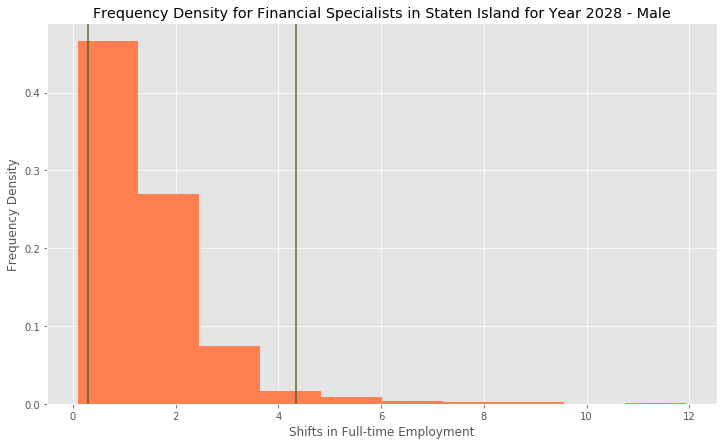

In [119]:
# Use the `plot` function to create a probability distribution histogram of simulated ending employment
# with markings for a 95% confidence interval
hist_tenth_cum_moves_staten = plt.figure()
tenth_cumulative_moves_staten.plot(kind='hist', density=True, bins=10, color = 'coral', 
                             title='Frequency Density for Financial Specialists in Staten Island for Year 2028 - Male', figsize=(12,7))
plt.xlabel('Shifts in Full-time Employment')
plt.ylabel('Frequency Density')
plt.axvline(tenth_confidence_interval_staten.iloc[0], color='darkolivegreen')
plt.axvline(tenth_confidence_interval_staten.iloc[1], color='darkolivegreen')
plt.show()

In [120]:
# Set initial employment
initial_employment_staten = financial_staten_male_last 

fig_finance_staten = plt.figure(figsize=(15,9))
fig_finance_staten.suptitle('Monte Carlo Simulation on Financial Specialists Job Market in Staten Island 30 Years from 2018 - Male', fontsize=17)
plt.plot(staten_employed_cumulative_moves * initial_employment_staten)
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

In [121]:
# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
employment_gnl_lower_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[0]
employment_gnl_upper_bound_staten = initial_employment_staten * confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f}k in male financial specialists"
      f" in Staten Island over the next 30 years will end within in the range of"
      f" {employment_gnl_lower_bound_staten:,.0f}k and {employment_gnl_upper_bound_staten:,.0f}k.")

There is a 95% chance that an initial employment of 3,342k in male financial specialists in Staten Island over the next 30 years will end within in the range of 392k and 46,684k.


In [122]:
# Calculate employment gain/loss of lower and upper bound cumulative portfolio returns
tenth_employment_gnl_lower_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[0]
tenth_employment_gnl_upper_bound_staten = initial_employment_staten * tenth_confidence_interval_staten.iloc[1]
                                                    
# Print the results
print(f"There is a 95% chance that an initial employment of {initial_employment_staten:,.0f}k in male financial specialists"
      f" in Staten Island over the next 10 years will end within in the range of"
      f" {tenth_employment_gnl_lower_bound_staten:,.0f}k and {tenth_employment_gnl_upper_bound_staten:,.0f}k.")

There is a 95% chance that an initial employment of 3,342k in male financial specialists in Staten Island over the next 10 years will end within in the range of 949k and 14,527k.


In [123]:
employed_trajectories_staten = initial_employment_staten * staten_employed_cumulative_moves.quantile(q=[0.05, 0.5, 0.95], axis='columns', numeric_only=True).T
employed_trajectories_staten.columns = ['Lower 5%', 'Median', 'Upper 5%']
employed_trajectories_staten

Lower 5%       Median      Upper 5%
0   3342.000000  3342.000000   3342.000000
1   2302.757094  3466.540147   4581.415781
2   2063.956591  3490.894543   5371.122927
3   1828.548482  3519.267385   6061.845042
4   1656.581592  3587.587233   6707.163110
5   1531.372528  3695.009681   7113.662853
6   1429.466704  3688.293176   8204.551514
7   1400.926103  3808.760274   8800.847545
8   1285.367528  3748.962233   9854.111462
9   1237.016266  3737.164681  10799.156528
10  1226.397209  3819.617065  10709.163964
11  1121.053273  3814.436865  11296.762127
12  1112.202365  3960.319961  12738.408137
13  1109.638782  3969.212842  14116.878506
14  1086.774530  4028.910908  14792.310702
15   992.328792  4129.315340  15468.714367
16   947.481021  4171.049330  16334.198255
17   877.124615  4325.224927  17649.032885
18   835.383104  4476.920398  19360.784628
19   781.459566  4459.191101  20417.414993
20   682.149362  4484.279773  21811.913528
21   722.229587  4649.934403  22568.820450
22   709.767124  4769.977325  22963.909790
23   745.274388  4698.857201  24512.411213
24   684.285786  4767.196391  25731.514422
25   691.697072  4658.404610  28055.615910
26   645.911944  4788.896191  26248.308754
27   623.740660  5033.607093  27571.624207
28   620.007414  4977.148397  29068.221815
29   626.646849  5073.580672  30074.753420
30   548.606430  5016.651539  28057.916427

In [150]:
ax_cum_employed_staten = plt.figure()
employed_trajectories_staten.plot(title="30-Year Trajectory on Full-Time Financial Specialists in Staten Isalnd with 3,342k Initial Employment in 2018 - Male",
                          figsize=(15, 9))
plt.axhline(y = financial_staten_male_last, color = 'black', linestyle = '-')
#plt.axhline(y = financial_staten_female_last, color = 'b', linestyle = '-')
plt.xlabel('Years')
plt.ylabel('Financial Specialists in Staten Island')
plt.show()

<Figure size 432x288 with 0 Axes>